# understanding of the data and the EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm 
import pylab as py 

import warnings
warnings.filterwarnings('ignore')
sns.set(style="dark")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/dphi_data/churn_prediction.csv')
data.head()


,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [5]:
data.shape

(28382, 21)

In [6]:
data.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'last_transaction'],
      dtype='object')

## `Variable Identification and typecasting`

In [7]:
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
last_transaction                   object
dtype: object

# lets look at each datatype seprately

In [8]:
data.dtypes[data.dtypes == 'int64']

customer_id             int64
vintage                 int64
age                     int64
customer_nw_category    int64
branch_code             int64
churn                   int64
dtype: object

- since customer id is unique num to represent each customer , we can leave it as integer , but its numerical description should not be considered.
- customer nw category is basically the category based on invome , so its ideally an ordinal variable so should be converted to category.
- churn is category which represent whether a customer will churn (1) or not(0) ? so should be typecasted

In [9]:
data['churn'] = data.churn.astype('category')
data['branch_code'] = data.branch_code.astype('category')
data['customer_nw_category'] = data.customer_nw_category.astype('category')

In [10]:
data.dtypes[data.dtypes == 'int64']

customer_id    int64
vintage        int64
age            int64
dtype: object

# float data type

In [11]:
data.dtypes[data.dtypes == 'float64']

dependents                        float64
city                              float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
dtype: object

In [12]:
data.dtypes

customer_id                          int64
vintage                              int64
age                                  int64
gender                              object
dependents                         float64
occupation                          object
city                               float64
customer_nw_category              category
branch_code                       category
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                             category
last_transaction                    object
dtype: object

- no of dependents can be discrete only , so it should be typecast to integer
- city is anonymised variable which is represeting different cities customer belong , so ideally it should be converted to category

In [13]:
data['dependents'] = data.dependents.astype('Int64')
data['city'] = data.city.astype('category')

In [14]:
data.dtypes

customer_id                          int64
vintage                              int64
age                                  int64
gender                              object
dependents                           Int64
occupation                          object
city                              category
customer_nw_category              category
branch_code                       category
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                             category
last_transaction                    object
dtype: object

- Gender , occupation and last_transaction have been assigned as object , that means pandas is not able to detect the datatype
- but from the fact we know that gender are occupations are my categories
- last_transaction is datetime variable

In [15]:
data['gender'] = data.gender.astype('category')
data['occupation'] = data.occupation.astype('category')


In [16]:
#creating an instance of datetime index class using last transaction column
date = pd.DatetimeIndex(data['last_transaction'])

In [17]:
#further creating new features from that

# last day of year when transaction was done
data['doy_ls_tran'] = date.dayofyear

# week of year when last transaction was done
data['woy_ls_tran'] = date.weekofyear

# month of year when last transaction was done
data['moy_ls_tran'] = date.month

# day of week when last transaction was done
data['dow_ls_tran'] = date.dayofweek

In [18]:
#now removing the variable last transaction date
data.drop(['last_transaction'], axis = 1,inplace = True)

**Breaking down the date variable** into these granular information will **help us in understand when the last transaction was done from different perspectives**. Now that we have extracted the essentials from the last_transaction variables, we will drop it from the dataset.

# seprating numerical columns

In [19]:
data.select_dtypes(include = ['int64', 'float64']).columns

Index(['customer_id', 'vintage', 'age', 'dependents', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'doy_ls_tran',
       'woy_ls_tran', 'moy_ls_tran', 'dow_ls_tran'],
      dtype='object')

In [20]:
numerical_column = data.select_dtypes(include = ['int64', 'float64', 'Int64']).columns

numerical_column

Index(['customer_id', 'vintage', 'age', 'dependents', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'doy_ls_tran',
       'woy_ls_tran', 'moy_ls_tran', 'dow_ls_tran'],
      dtype='object')

---

minimum current balance

In [21]:
data[data['current_balance'] == data.current_balance.min()]

# -5503.96 is the min balance so far for any customer

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,doy_ls_tran,woy_ls_tran,moy_ls_tran,dow_ls_tran
12608,13467,2140,80,Male,0,retired,1096.0,1,27,-5503.96,423.06,1694.57,868.26,9471.01,2680.04,15229.44,7859.37,1050.17,2002.97,1,360.0,52.0,12.0,3.0


In [22]:
#Maximum current month debit
data[data['current_month_debit'] == data.current_month_debit.max()]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,doy_ls_tran,woy_ls_tran,moy_ls_tran,dow_ls_tran
24095,25712,1902,90,Male,0,retired,1020.0,2,5,46.5,24270.54,11728.39,111617.41,12269845.39,0.21,7637857.36,0.21,8399.62,24270.54,1,347.0,50.0,12.0,4.0


# range

In [23]:
#min max for each column
data[numerical_column].min()

customer_id                           1.00
vintage                              73.00
age                                   1.00
dependents                            0.00
current_balance                   -5503.96
previous_month_end_balance        -3149.57
average_monthly_balance_prevQ      1428.69
average_monthly_balance_prevQ2   -16506.10
current_month_credit                  0.01
previous_month_credit                 0.01
current_month_debit                   0.01
previous_month_debit                  0.01
current_month_balance             -3374.18
previous_month_balance            -5171.92
doy_ls_tran                           1.00
woy_ls_tran                           1.00
moy_ls_tran                           1.00
dow_ls_tran                           0.00
dtype: float64

In [24]:
data[numerical_column].max()

customer_id                          30301.00
vintage                               2476.00
age                                     90.00
dependents                              52.00
current_balance                    5905904.03
previous_month_end_balance         5740438.63
average_monthly_balance_prevQ      5700289.57
average_monthly_balance_prevQ2     5010170.10
current_month_credit              12269845.39
previous_month_credit              2361808.29
current_month_debit                7637857.36
previous_month_debit               1414168.06
current_month_balance              5778184.77
previous_month_balance             5720144.50
doy_ls_tran                            365.00
woy_ls_tran                             52.00
moy_ls_tran                             12.00
dow_ls_tran                              6.00
dtype: float64

In [25]:
#range of each variable
for col in numerical_column:
    print("range of {}{}{}{}{}{}{}{}{}".format(col, ':', " ", "[", data[col].max(), ",", " ", data[col].min(), "]"))

range of customer_id: [30301, 1]
range of vintage: [2476, 73]
range of age: [90, 1]
range of dependents: [52, 0]
range of current_balance: [5905904.03, -5503.96]
range of previous_month_end_balance: [5740438.63, -3149.57]
range of average_monthly_balance_prevQ: [5700289.57, 1428.69]
range of average_monthly_balance_prevQ2: [5010170.1, -16506.1]
range of current_month_credit: [12269845.39, 0.01]
range of previous_month_credit: [2361808.29, 0.01]
range of current_month_debit: [7637857.36, 0.01]
range of previous_month_debit: [1414168.06, 0.01]
range of current_month_balance: [5778184.77, -3374.18]
range of previous_month_balance: [5720144.5, -5171.92]
range of doy_ls_tran: [365.0, 1.0]
range of woy_ls_tran: [52.0, 1.0]
range of moy_ls_tran: [12.0, 1.0]
range of dow_ls_tran: [6.0, 0.0]


obviously from this data we can see, that the range of current_balance is highest.

In [26]:
#extracting the age of people who churned
churn_age = data[data['churn']== 1]['age']

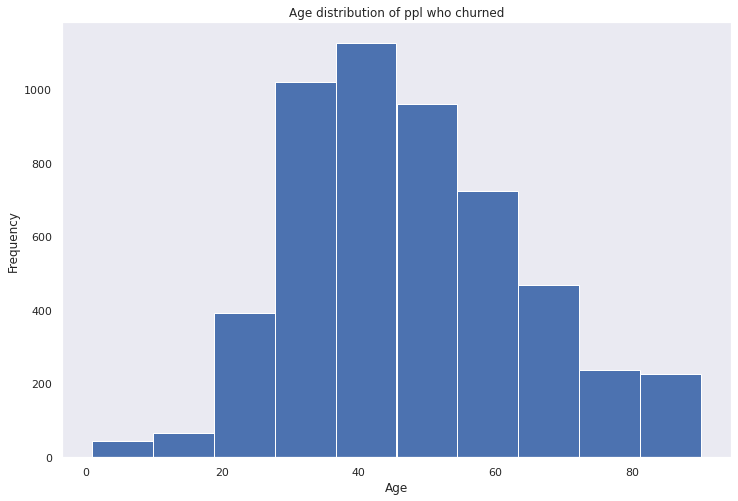

In [27]:
#knowing the distribution of ppl who churned
plt.figure(figsize = (12,8))
plt.hist(churn_age)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age distribution of ppl who churned')
plt.show()
#since histogram uses bins that's why it showing structure quite similar to discrete variable, since its not smooth
#if we try to decrease the no of bins we used , it will show even more discrete nature

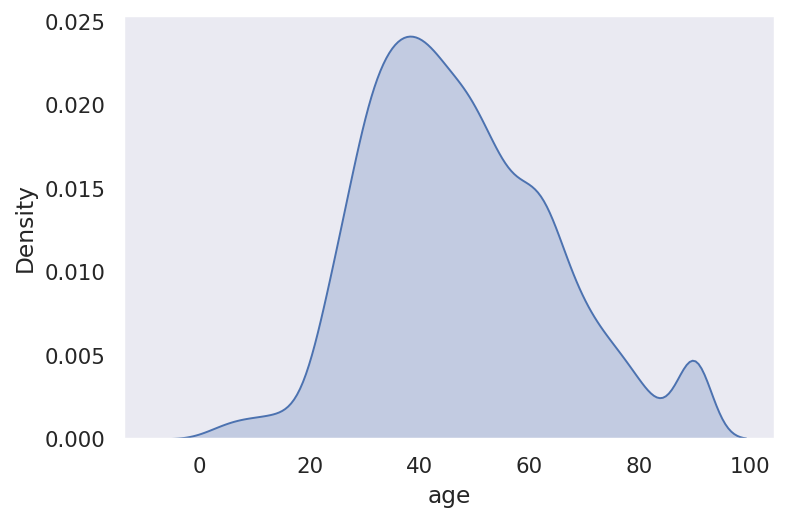

In [28]:
#let's try kernel density plots to know about the distribution well
plt.figure(dpi = 140)
sns.kdeplot(churn_age, shade = True)

In [29]:
mean = churn_age.mean()
median = churn_age.median()
stddev = churn_age.mean() - np.std(churn_age), churn_age.mean() + np.std(churn_age)

mean, median, stddev

(47.461216730038025, 45.0, (30.286875358055376, 64.63555810202067))

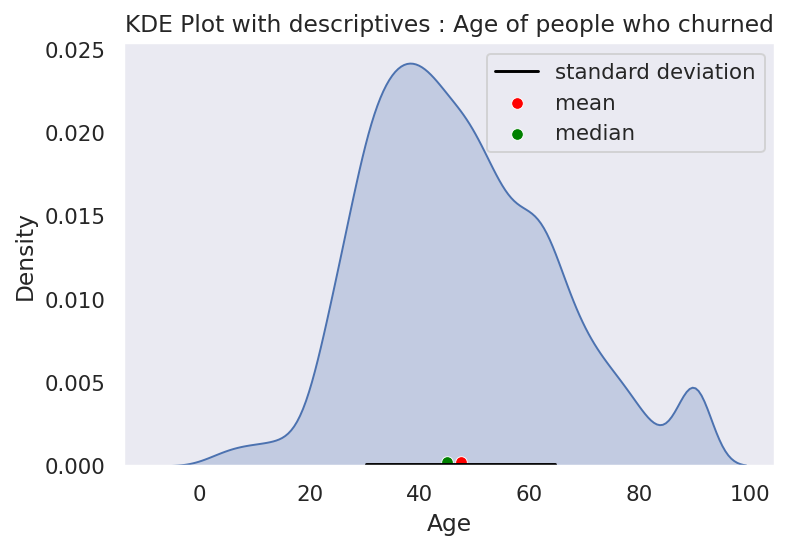

In [30]:
plt.figure(dpi = 140)
sns.kdeplot(churn_age, shade = True)
sns.scatterplot(x =  [mean],y =  [0.0002], color='red', label='mean')
sns.scatterplot(x =  [median],y = [0.0002], color='green', label='median')
sns.lineplot(x = stddev, y = [0.0001,0.0001], color='black', label='standard deviation')
plt.xlabel("Age")
plt.ylabel('Density')
plt.title("KDE Plot with descriptives : Age of people who churned")
plt.show()


In [31]:
churn_age.skew()

0.4537531697430503

In [32]:
#lets further do our univariate analysis by segregating our info into different groups
data.select_dtypes(include = ['int64', 'float64', 'Int64']).columns

Index(['customer_id', 'vintage', 'age', 'dependents', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'doy_ls_tran',
       'woy_ls_tran', 'moy_ls_tran', 'dow_ls_tran'],
      dtype='object')

In [33]:
customer_details = ['customer_id', 'vintage', 'age']
current_month = ['current_balance', 'current_month_credit', 'current_month_debit', 'current_month_balance']
previous_month = ['previous_month_end_balance', 'previous_month_credit', 'previous_month_debit', 'previous_month_balance']
previous_quarters = ['average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2']
transaction_data = ['doy_ls_tran', 'woy_ls_tran', 'moy_ls_tran', 'dow_ls_tran']

---

In [34]:

# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 140)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

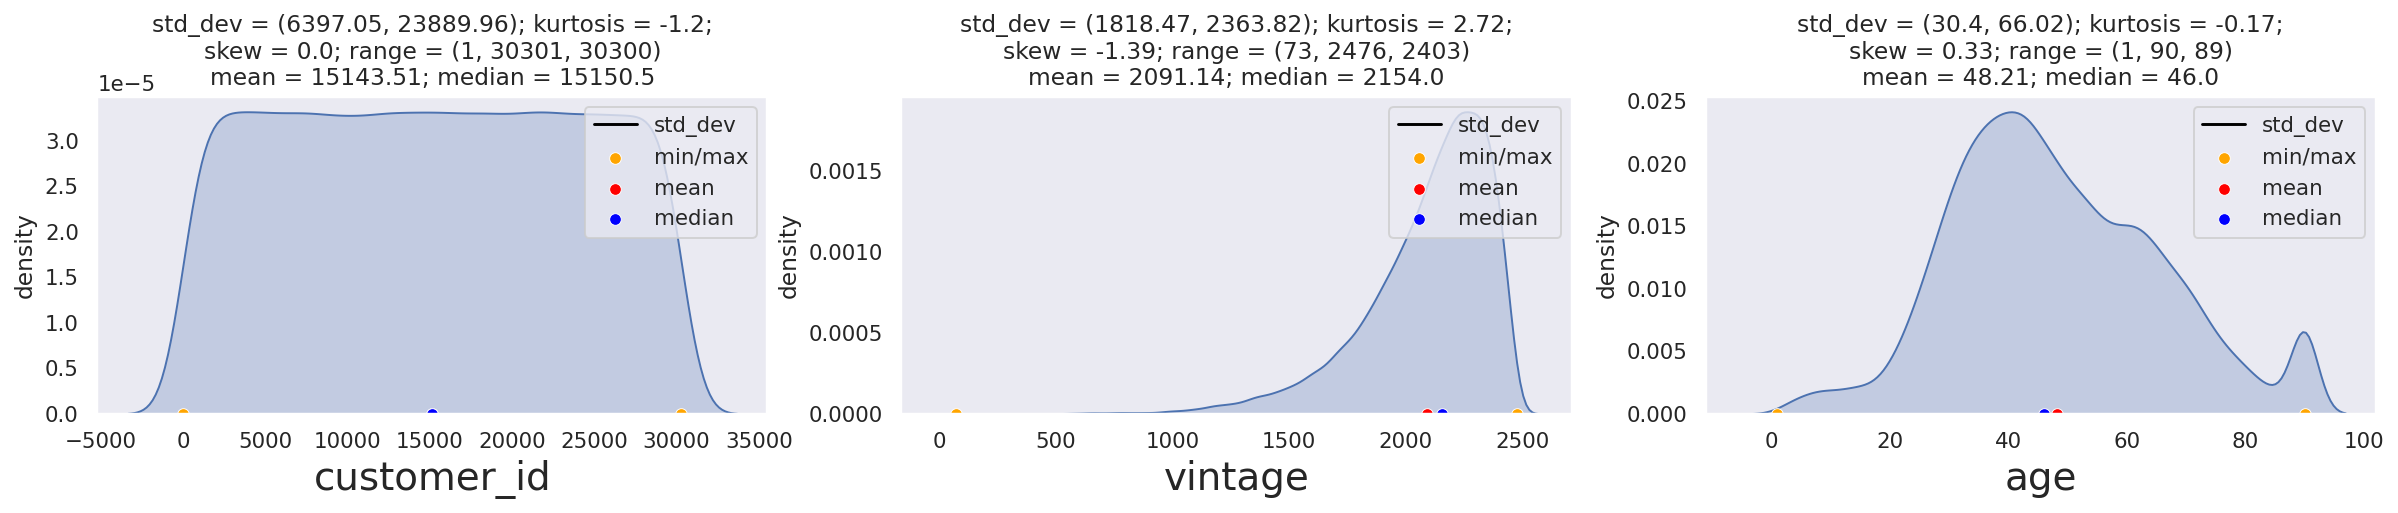

In [35]:
UVA_numeric(data, customer_details)


**Summary of Customer_Information:**

- customer_id:

- variable is unique for every customer, Hence uniform distribution.
- This variable does not contribute any information
- Can be eliminated from data

**age:**

- Median Age = 46
- Most customers age between 30 to 66
- skewness +0.33 : customer age is negligibly biased towards younger age
- kurtosis = -0.17; very less likely to have extreme/outlier values.

**vintage:**
- Most customers joined between 2100 and 2650 days from the day of data extraction.
- skewness -1.42 : this is left skewed, vintage variable is significantly biased towards longer association of customers.
- Kurtosis = 2.93: Extreme values and Outliers are very likely to be present in vintage.
- Things to Investigate Further down the road:

**intresting questions to be look upon**
- The batch of high number of very Old Age customers in age variable, as we can see there is bump in age group part which could be intresting to explore further.
- churn rate of high vintage customer , since this can be a really intresting factor like might be there can be a case where customers with high vintage are more loyal or much satisfied with the services so there can be a low churn rate or vice versa

---
# current month

In [36]:
# from google.colab import drive
# drive.mount('https://drive.google.com/file/d/10KSZ0X7LTnKmuvBKL4nGLnM3nCzMvIDq/view?usp=sharing')

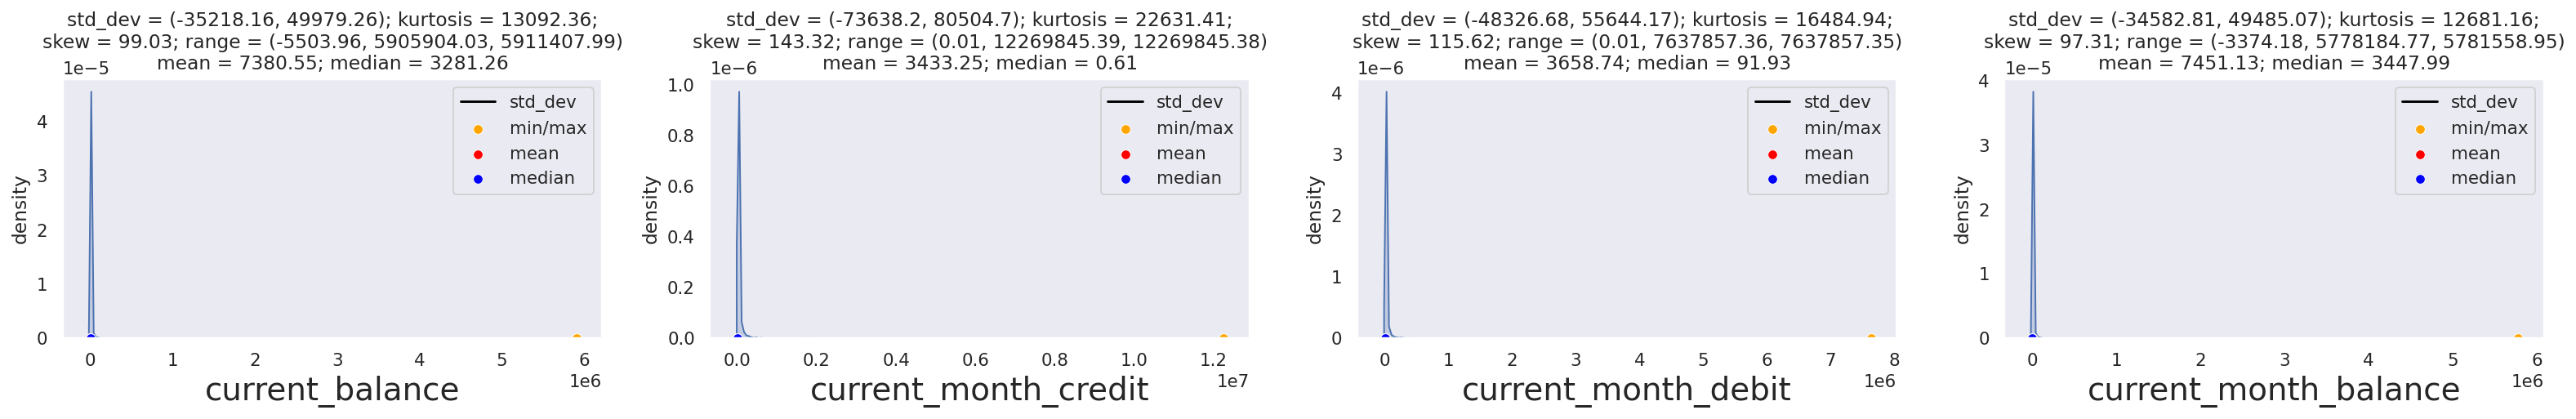

In [37]:
UVA_numeric(data, current_month)

- we can see there is a huge difference between mean and median current month credit and current month debit , which also direct us to the fact that there are a large no of ppl whi are not doing any transaction at all or some really small transaction furthermore there range also gives us an idea about this
- we can clearly see that due to presence of high no of outliers , we cant visualize current_month data directly , so in order to visualize it properly we need remove those outliers, for that we can make use of 3- sigma limit initially

In [38]:
data[current_month].columns

Index(['current_balance', 'current_month_credit', 'current_month_debit',
       'current_month_balance'],
      dtype='object')

In [39]:
factor = 3
cm_data = data[current_month]

# filtering all those feature which are beyond my 3-sigma limit
cm_data = cm_data[cm_data['current_balance'] < factor * cm_data['current_balance'].std()]
cm_data = cm_data[cm_data['current_month_credit'] < factor * cm_data['current_month_credit'].std()]
cm_data = cm_data[cm_data['current_month_debit'] < factor * cm_data['current_month_debit'].std()]
cm_data = cm_data[cm_data['current_month_balance'] < factor * cm_data['current_month_balance'].std()]

In [40]:
factor * cm_data['current_balance'].std()

16160.640355493066

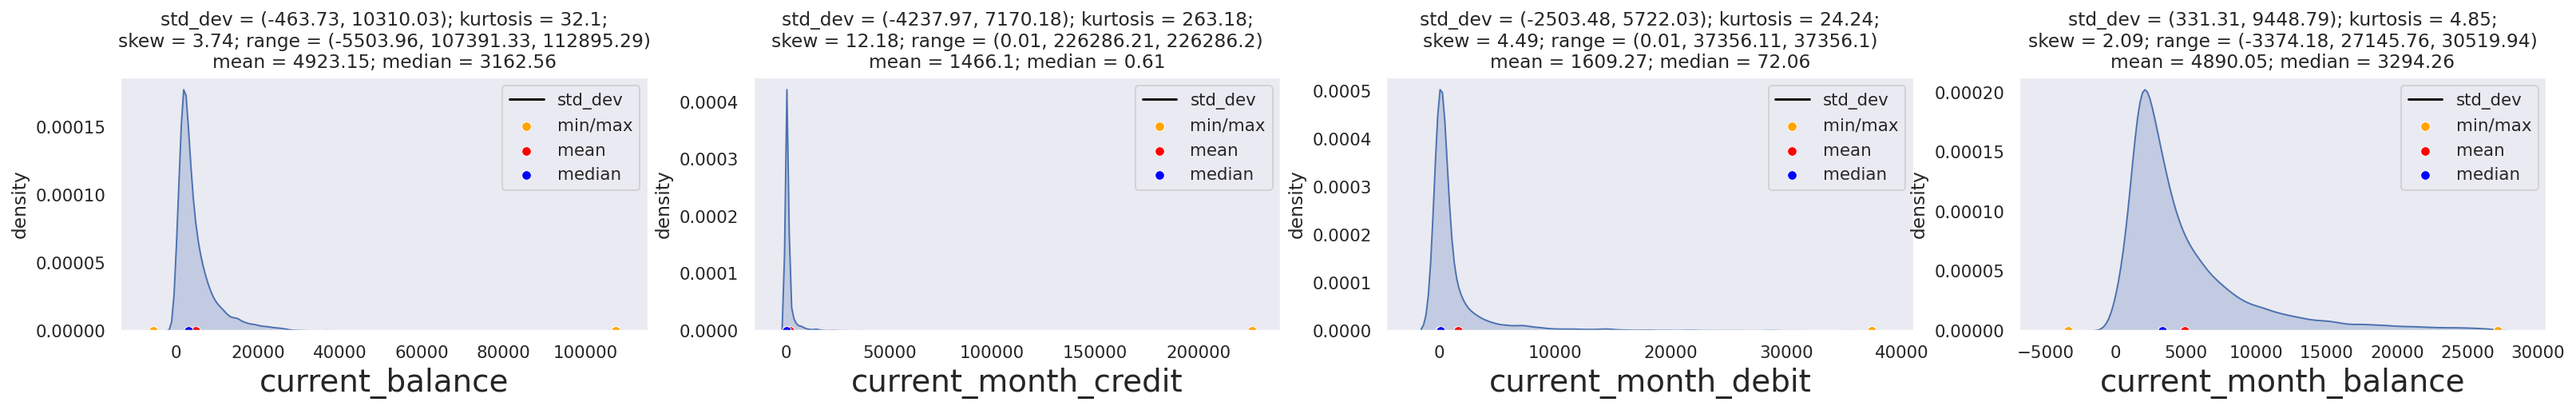

In [41]:
#now lets try and plot the current month again
UVA_numeric(cm_data, current_month)

In [42]:
cm_data.shape, data.shape

((27113, 4), (28382, 24))

- we can clearly see that even after removing 1200 outlier data points from the model, we still have a large no of outliers present in my dataset
- current month_credit is still really high skewed, so we might further wants to do some kind of transformation on this data
- all the attribute are still positively skewed , which suggests presence of extreme values and also the concentration a lot of customers o lower balances


***things we may investigate even further***
- people who are doing really high level of transaction , are they doing it every month? if yes can we see any specific kind of behaviour of those ppl towards churning?
- is there any common relation between customer performing high level of transaction?

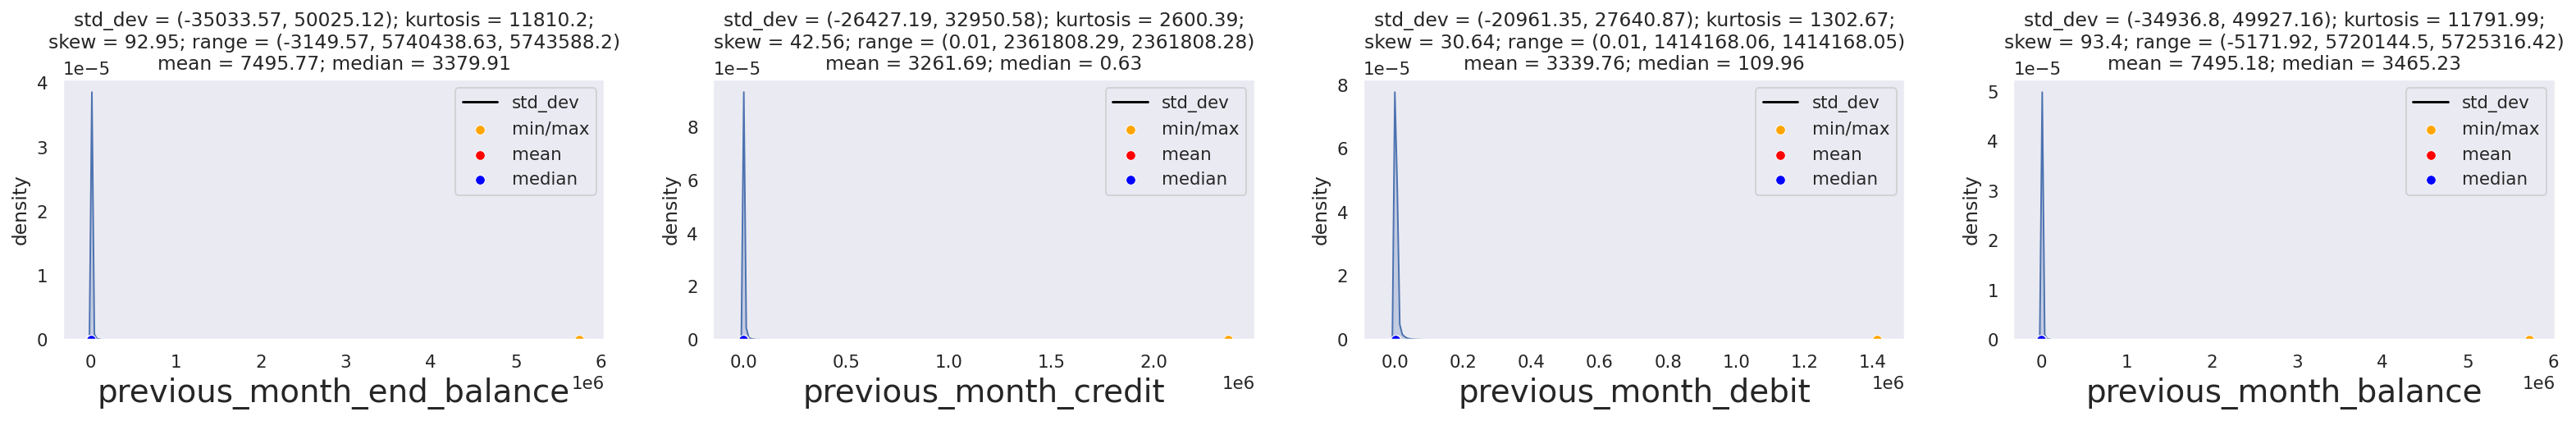

In [43]:
# lets try previous month
UVA_numeric(data, previous_month)

- still we can see a same kind of trend that we have earlier , most of the customers performed low transaction even in the previous month

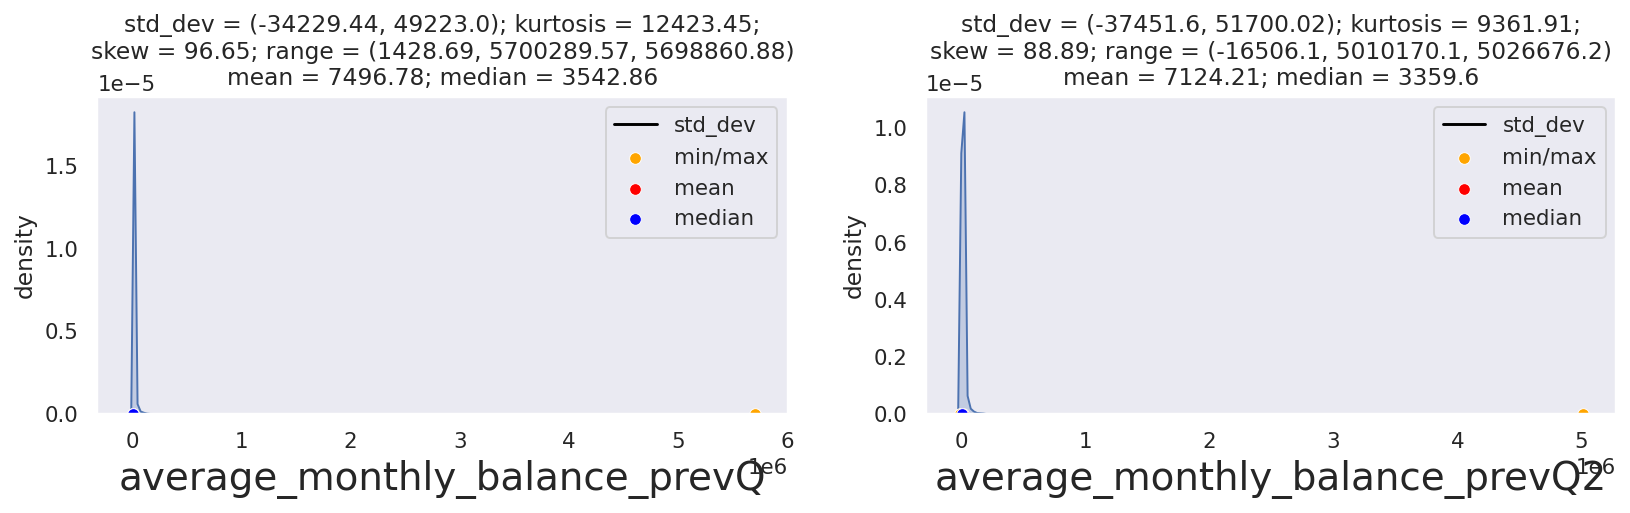

In [44]:
#lets try and see the previous quarter
UVA_numeric(data, previous_quarters)

- nothing new here as well , the same kind of pattern we can find in previous quarter 
- since we can see a kind of general trend in all the previous month as well, it might be crucial to see how these high transaction and monthly vlalance customers are doing with respect to churn

# last transaction

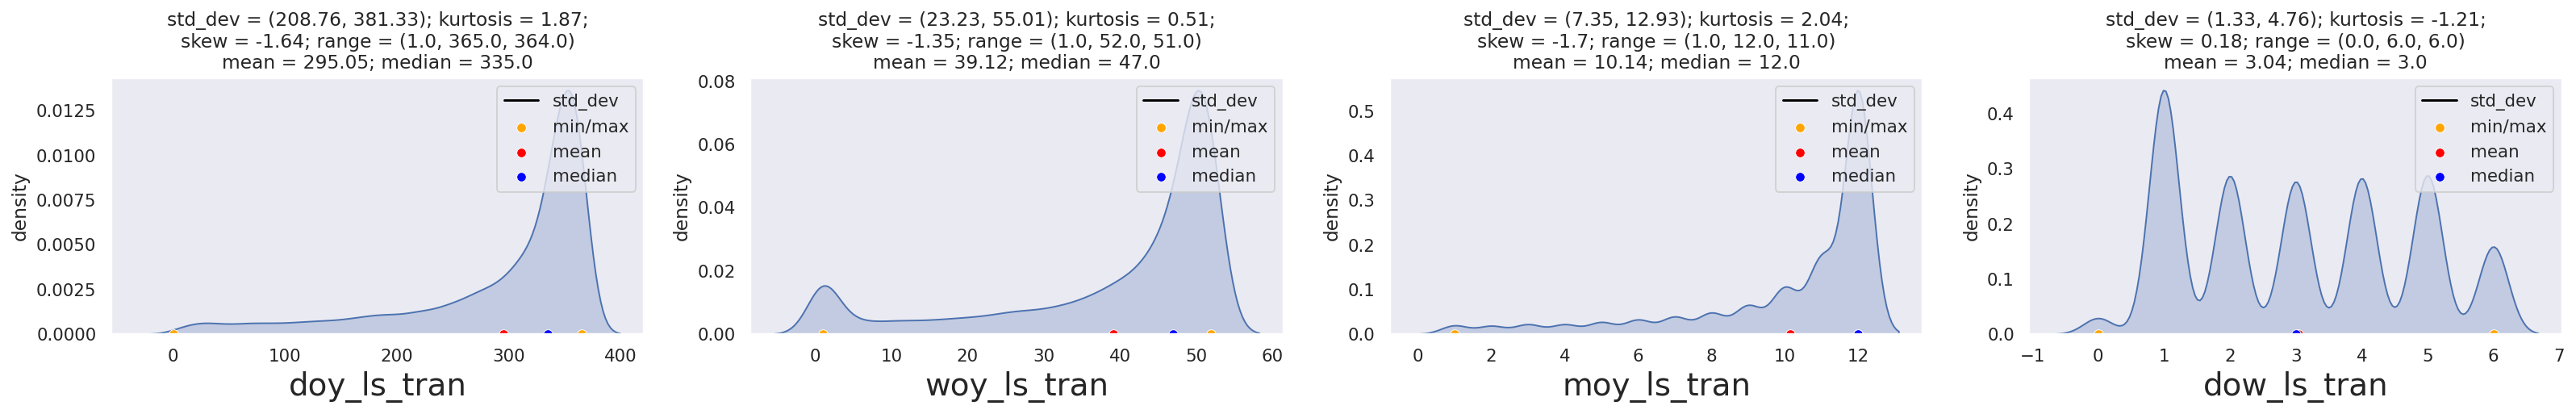

In [45]:
UVA_numeric(data, transaction_data)

- here there are some intresting pattern that we can observe like, on an avg no of transaction on monday is more than any other day, which might be an intresting factor to explore even further
- most of the transaction have been done in the past 2 months
- most of the transaction wrt week have been done either in the last 15 weeks nd also there is bump in the intial part which might be intresting to explore
- wrt to days most of the transaction is done in last around 100 days

*** an obvious question to look for in that condition might be***
- `what is the behaviour of the customers wrt churning who have done their last transaction around 6 months ago`

# univariate analysis - categorical data

In [46]:
#looking up the attribute to explore further
data.select_dtypes(exclude = ['Int64', 'int64', 'float64']).dtypes

gender                  category
occupation              category
city                    category
customer_nw_category    category
branch_code             category
churn                   category
dtype: object

In [47]:
#again grouping them on similar kind of information
customer_info_cat = ['gender', 'occupation', 'customer_nw_category']
account_info= ['city', 'branch_code']
status = ['churn']

In [48]:
def UVA_categorical(data, var_group):
    
    size = len(var_group)
    plt.figure(figsize = (7*size, 5), dpi = 100)
        
        #iterate for every variable computing value count nd unique values
    for j,i in enumerate(var_group):
            
        norm_count = data[i].value_counts(normalize = True)
        n_uni = data[i].nunique()
    #plots
    plt.subplot(1,size, j+1)
    sns.barplot(norm_count, norm_count.index, order = norm_count.index)
    plt.xlabel('Fraction')
    plt.ylabel('{}'.format(i))
    plt.title('nunique: {} \n value_counts {} \n'.format(n_uni, norm_count))
            
        


In [49]:
#UVA_categorical(data, ['gender', 'occupation', 'customer_nw_category'])

In [50]:
def UVA_category(data, var_group):
    

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

In [51]:
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,doy_ls_tran,woy_ls_tran,moy_ls_tran,dow_ls_tran
0,1,2101,66,Male,0,self_employed,187.0,2,755,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,141.0,21.0,5.0,1.0
1,2,2348,35,Male,0,self_employed,NaN,2,3214,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,305.0,44.0,11.0,4.0
2,4,2194,31,Male,0,salaried,146.0,2,41,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaN,NaN,NaN,NaN
3,5,2329,90,NaN,<NA>,self_employed,1020.0,2,582,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,218.0,32.0,8.0,1.0
4,6,1579,42,Male,2,self_employed,1494.0,3,388,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,307.0,44.0,11.0,6.0


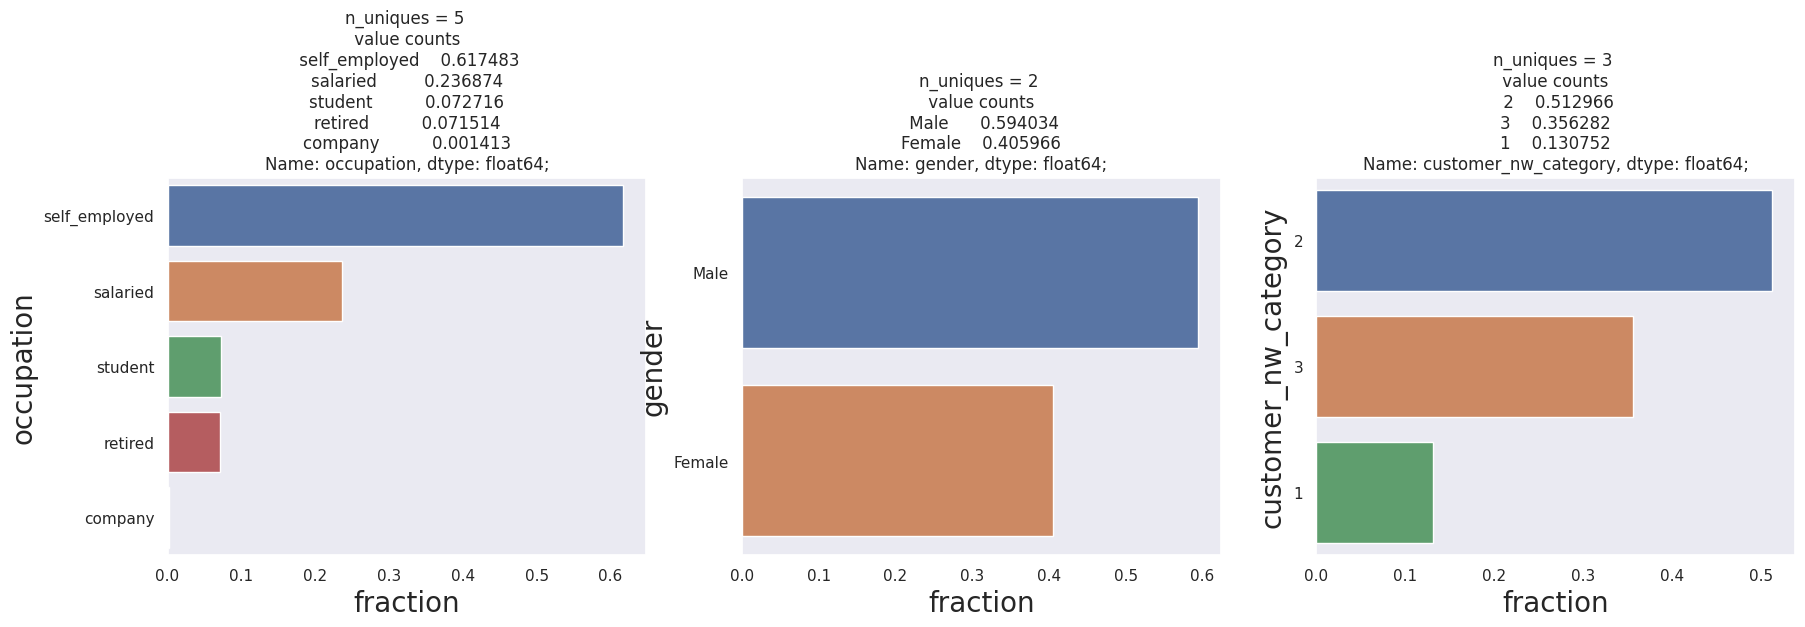

In [52]:
UVA_category(data, ['occupation', 'gender', 'customer_nw_category'])

- large no of male then female in the datset
- large no of ppl from medium net worth than any other category
- a good no of high category net worth , they might be the reason of skewness in the datset
- large no of self employed ppl, and a very less no of companies which might also be the outlier of my data

***to investigate further**
- which occupation customer are the reason behind my outlier transaction?
- do customer of high net worth category explain the high amount transactions?

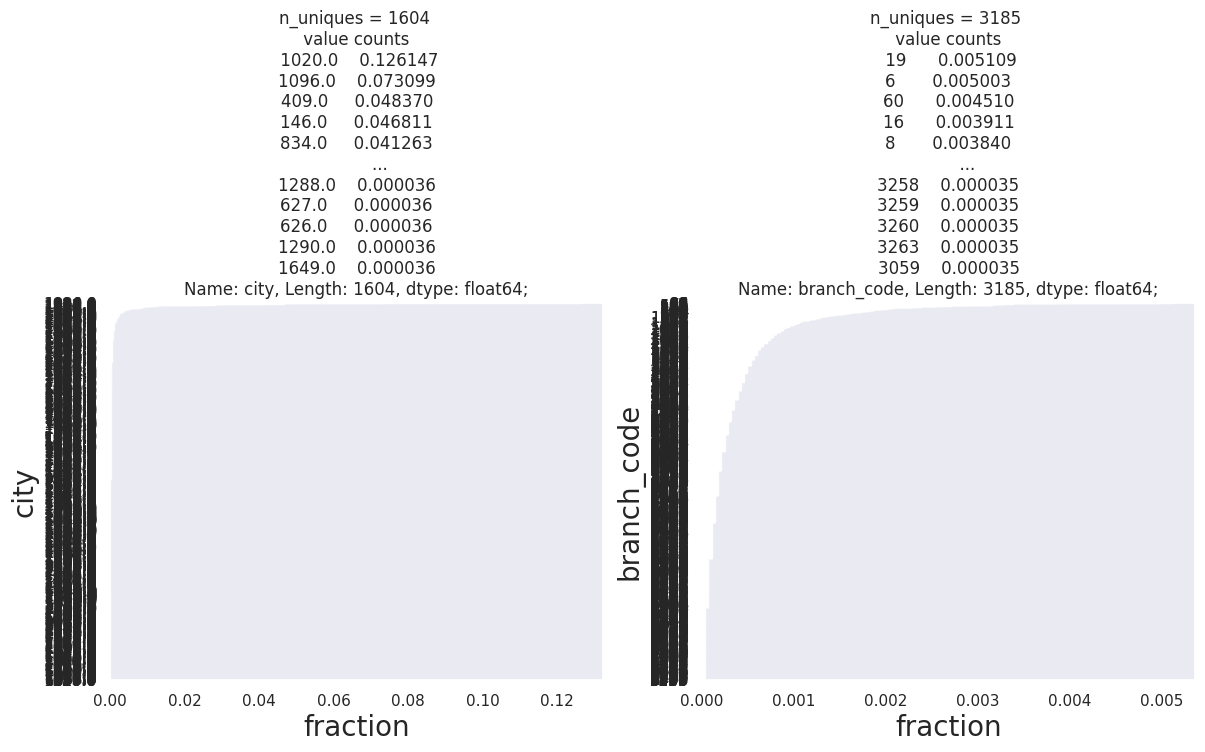

In [126]:
UVA_category(data, ['city', 'branch_code'])

- we can see that since , there are a lot of unique values , we are not able to visualize it properly
- popular cities and branch code might be able to explain the skewness and outlier of debit/credit variables
- cities with low customers and low no of branches may lead to churning


(0.0, 0.02)

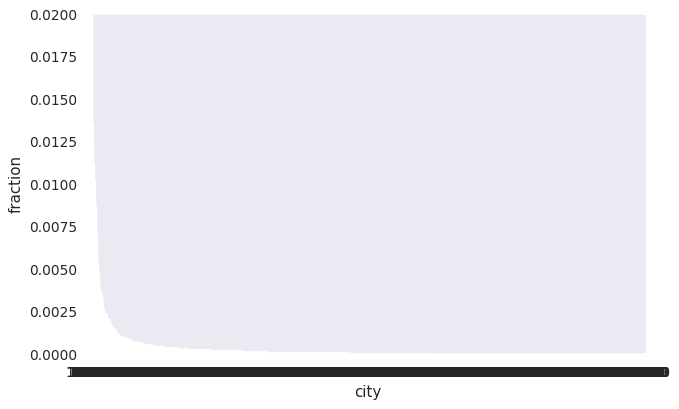

In [127]:
#plotting cities
plt.figure(figsize = (8,5), dpi = 90)
city_count = data.city.value_counts(normalize = True)
sns.barplot(x = city_count.index, y= city_count, order = city_count.index)
plt.xlabel('city')
plt.ylabel('fraction')
plt.ylim(0,0.02)

Text(0, 0.5, 'fraction')

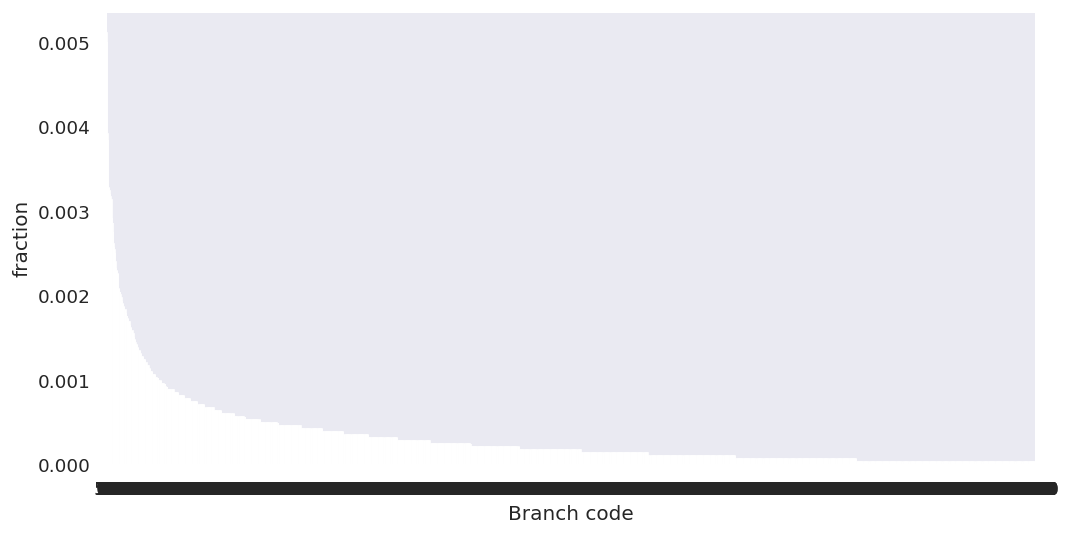

In [128]:
# #plotting branch_code
plt.figure(figsize = (10,5), dpi = 120)
code_count = data.branch_code.value_counts(normalize = True)
sns.barplot(x = code_count.index, y = code_count, order = code_count.index)
plt.xlabel('Branch code')
plt.ylabel('fraction')
#we can see that there are 

Text(0, 0.5, 'count')

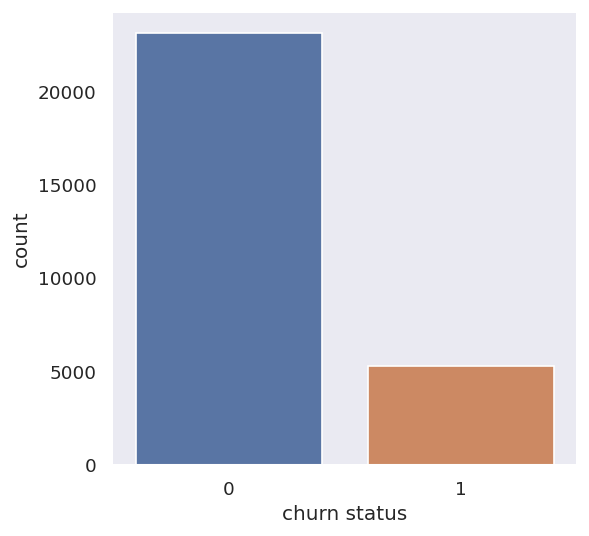

In [56]:
#UVA_category(data, ['churn'])
plt.figure(figsize = (5,5), dpi = 120)
code_count = data.churn.value_counts()
sns.barplot(x = code_count.index, y = code_count, order = code_count.index)
plt.xlabel('churn status')
plt.ylabel('count')

- no of people who churned are around 1/4 of the people who did not churned

# univariate analysis : missing value analysis

In [57]:
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
doy_ls_tran                       3223
woy_ls_tran                       3223
moy_ls_tran                       3223
dow_ls_tran                       3223
dtype: int64

- does all the missing gender ppl have same kind of behaviour?
- does missingness in gender have any relation with churn?
---
- can we consider missing values in dependents as 0 dependents?
- does it have any relation with my churn?
---
- do missing values in occupation have similar behaviour as any other occupation?
- does occupation has anything to do with churn here?
- do all the city with missing values have values in branch_code( hypothetically) since city is anonymised
---
- can values missing in last_transaction variables be identified or guessed using current month, previous month, previous quarter transaction?


# univariate analysis - outliers
- we have already seen in numerical analysis that current month, prev. month and quarters var_groups have high amount of outliers.

In [58]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = med-(1.5*IQR)
    whis_high = med+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      print(include_outlier)
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

True
True
True
True


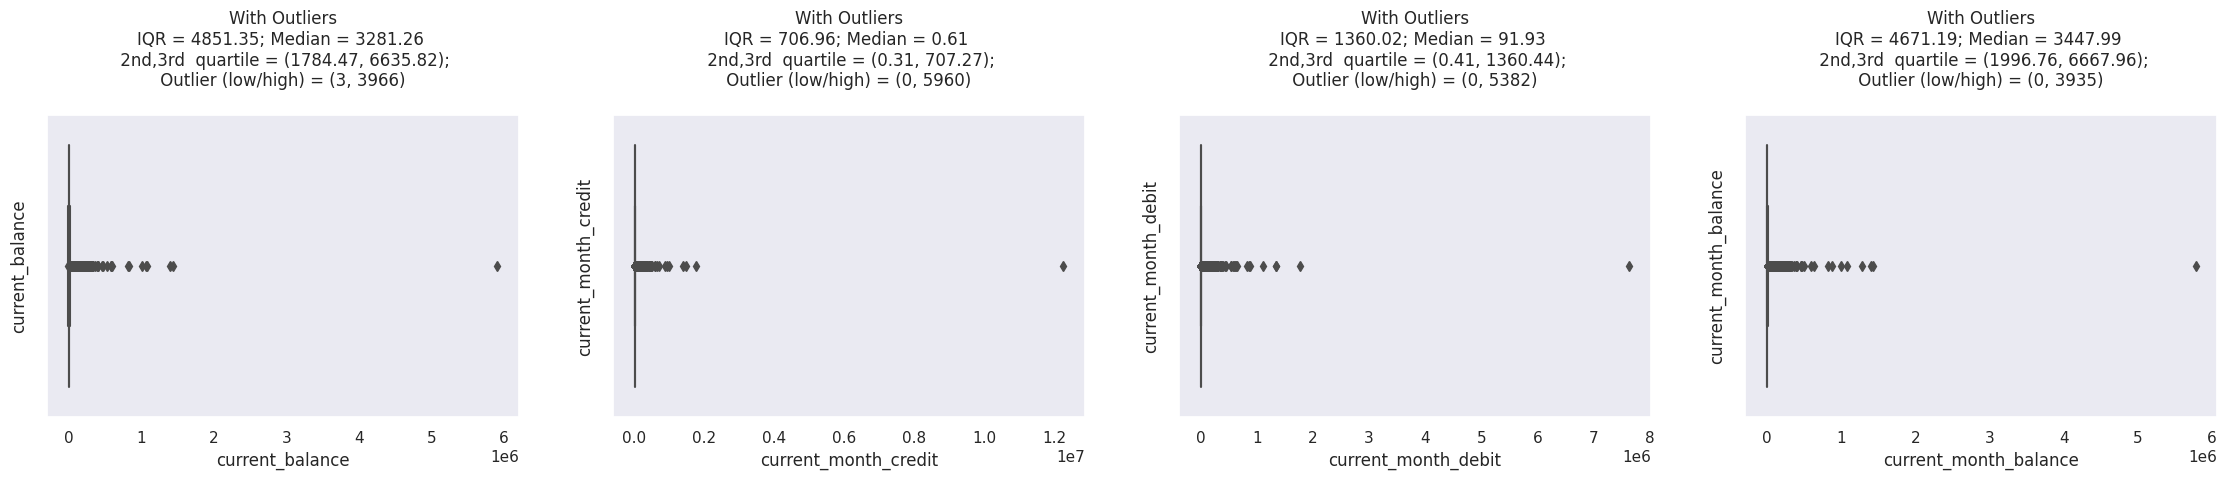

In [59]:
UVA_outlier(data, current_month)

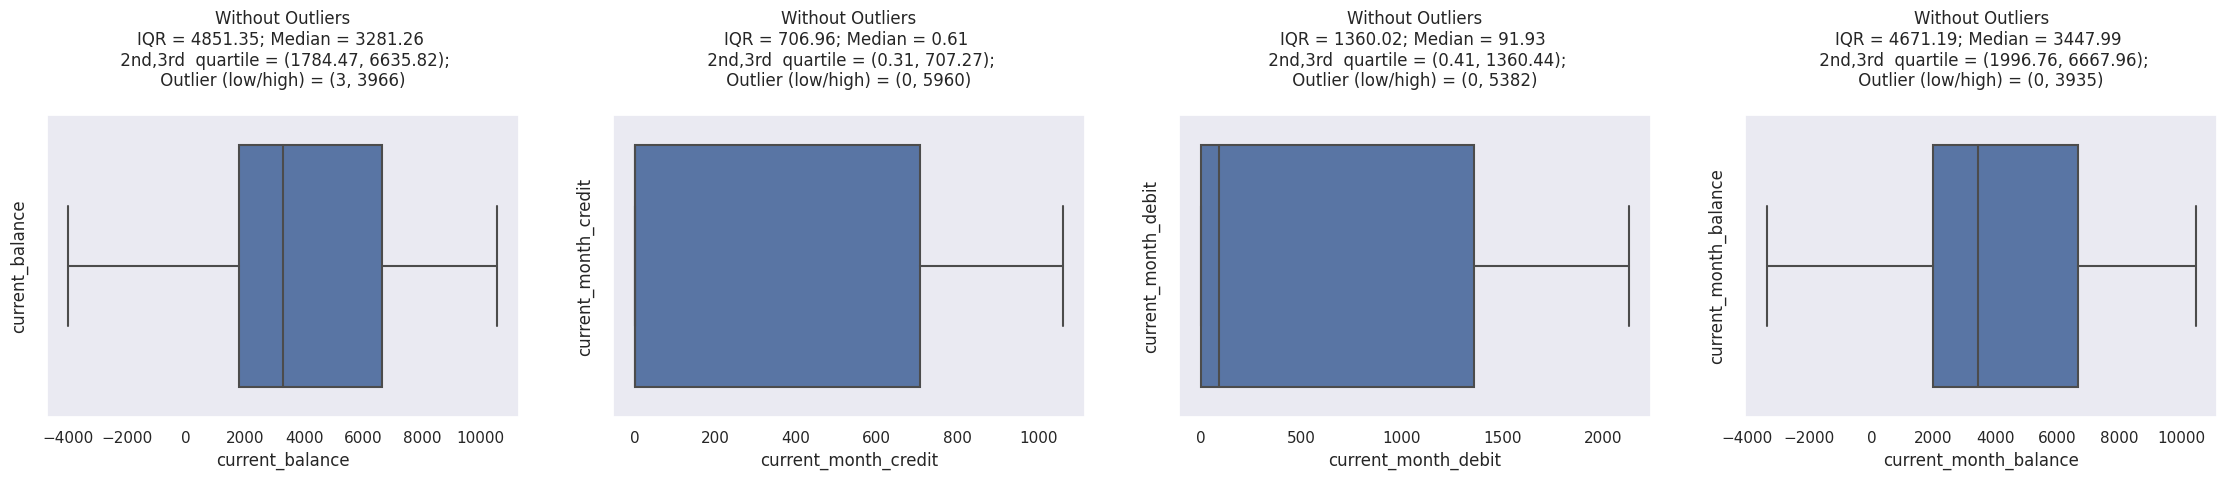

In [60]:
UVA_outlier(data, current_month, include_outlier = False)

True
True
True
True


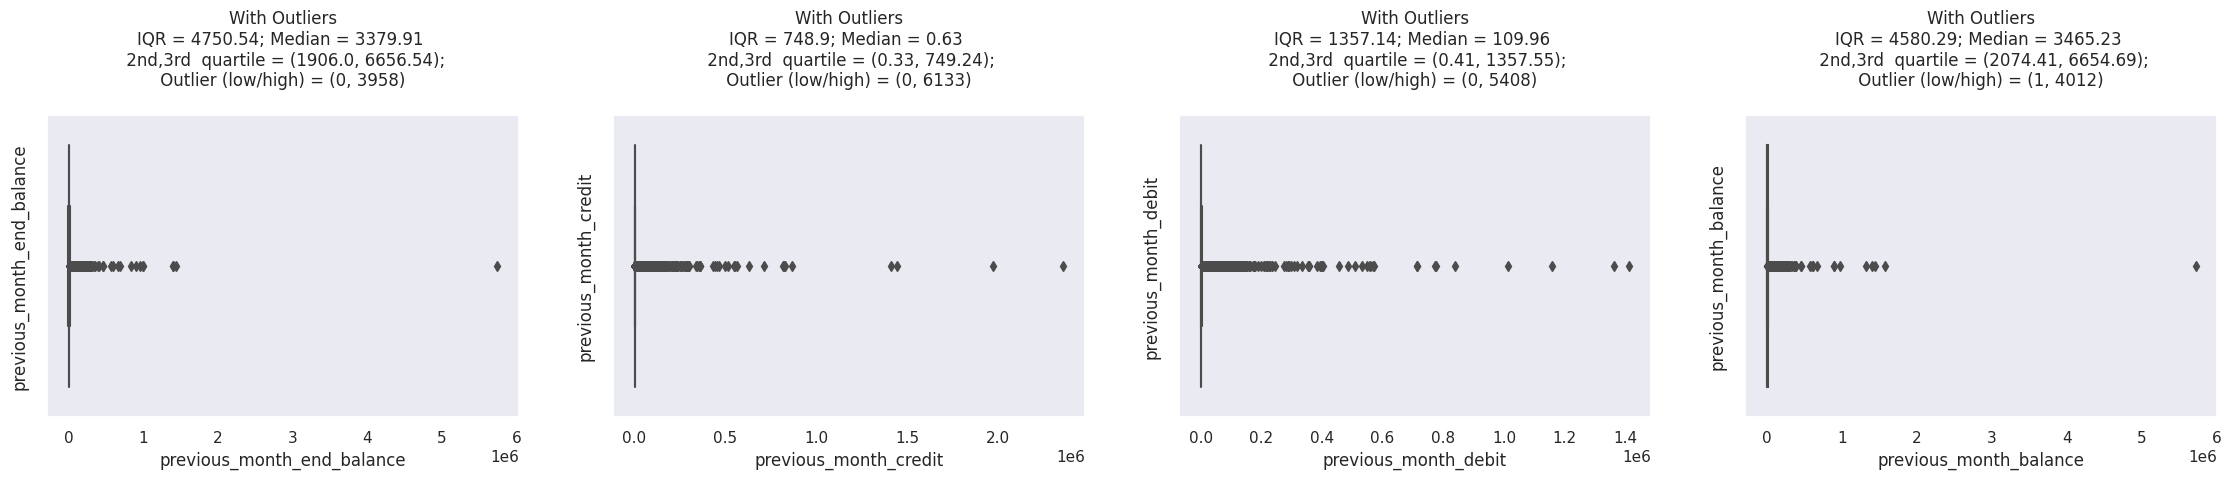

In [61]:
#lets check the previous month
UVA_outlier(data, previous_month)
#here as well a lot of outliers , so lets see by removing those outlier

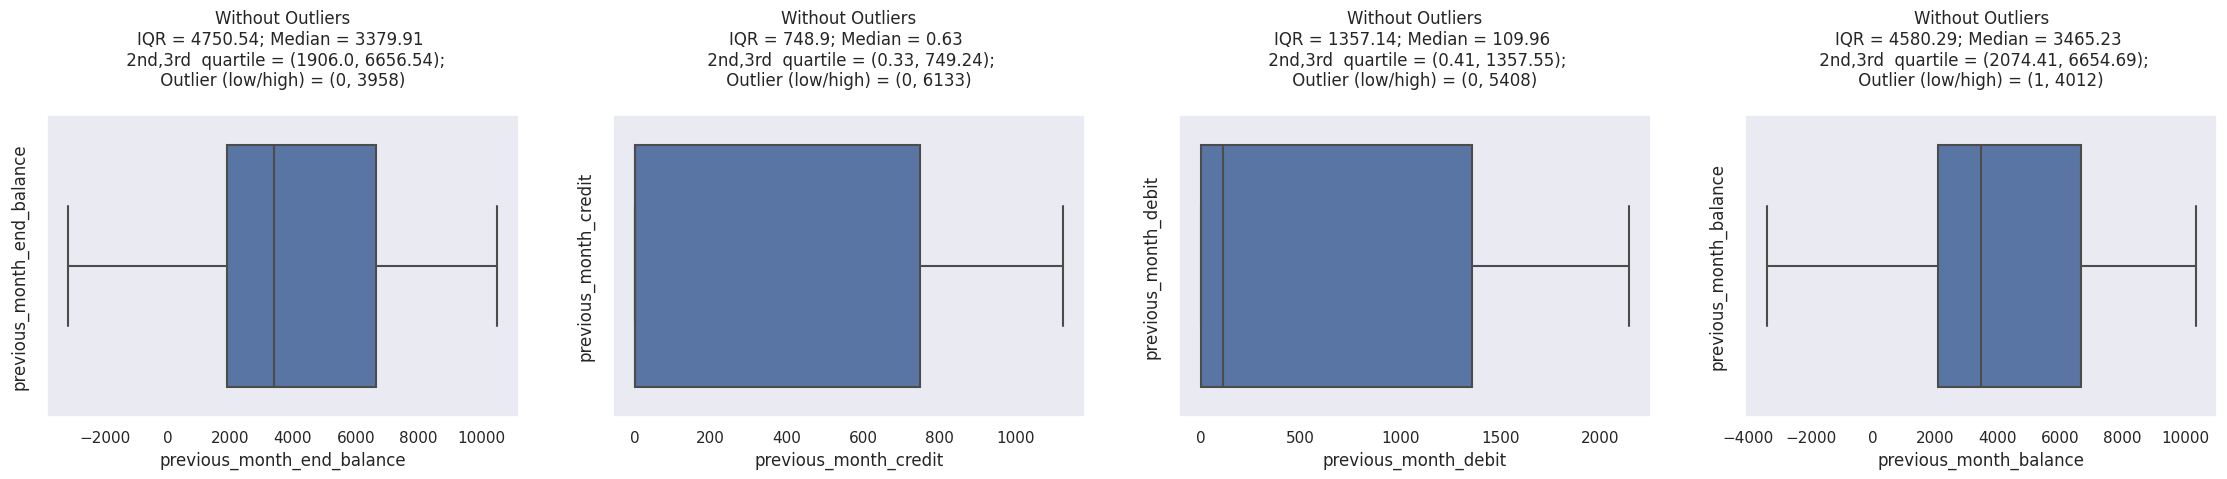

In [62]:
UVA_outlier(data, previous_month, include_outlier = False)

- in the current month and previous month there are a large no of outliers which are present , also there is a very similar behaviour of these variables in both the month , which direct us towards some direct relation between these to explore further in bivariate analysis
- also seems there is a high correlation between these two current and previous month var groups

True
True


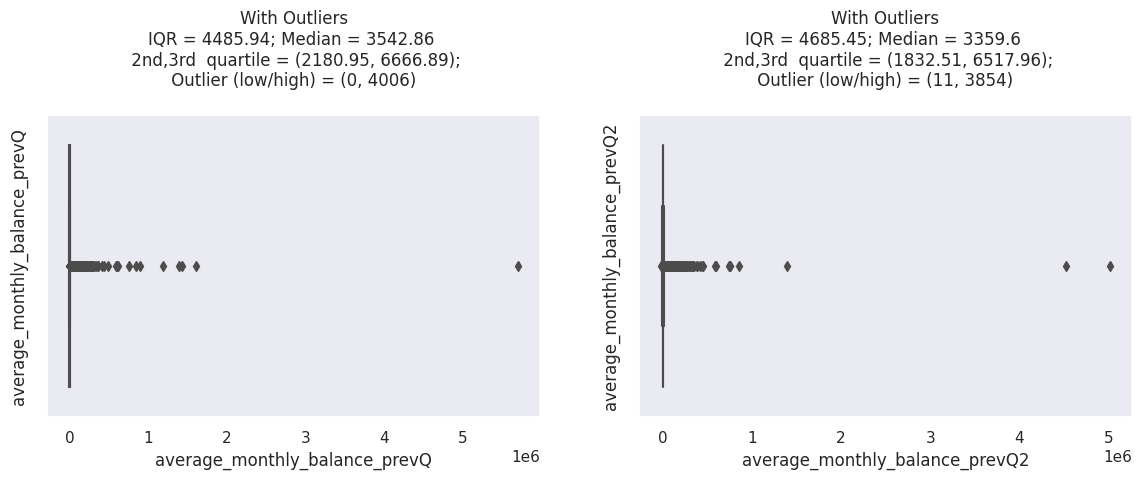

In [63]:
#lets see the previous quarter as well since, initially it also showed the same behaviour
UVA_outlier(data, previous_quarters)

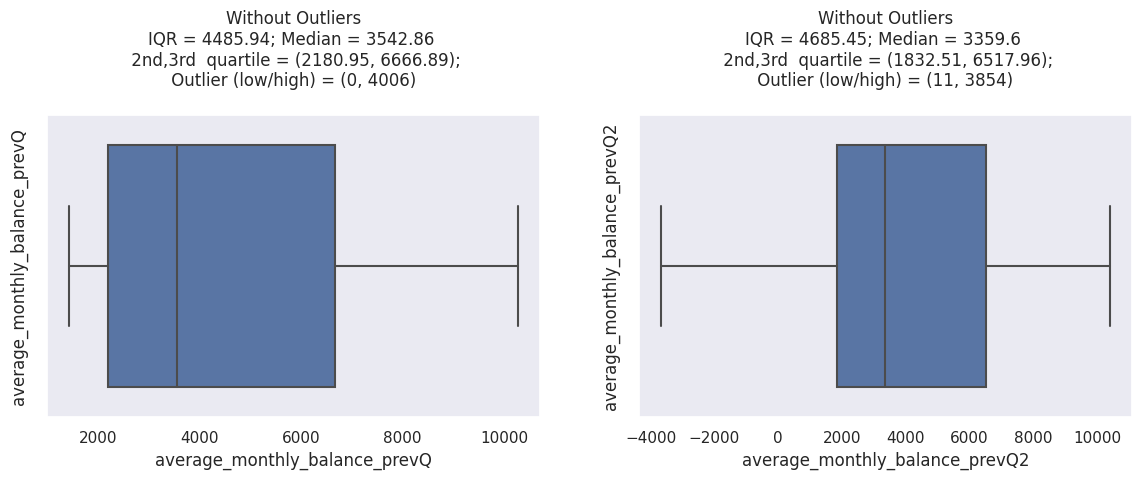

In [64]:
UVA_outlier(data, previous_quarters, include_outlier = False)
#outliers in previous two quarters are very large in number and distributed in similar fashion which also make us feel these are the same set of ppl

## direction from univariate analysis
1. customer_id variable can be dropped as it coveys no meaning towards explainaibility
2.  Is there there any common trait/relation between the customers who are performing high transaction credit/debits?
   * customer_nw_category might explain that.
   * Occupation = Company might explain them
   * popular cities might explain this
4.  Customers whose last transaction was 6 months ago, did all of them churn? 
5. Possibility that cities and branch code with very few accounts may lead to churning.

# Bi- variate analysis (numerical - numerical)

In [65]:
#seprating the numerical variables
numerical = data.select_dtypes(include = ['int64', 'float64', 'Int64'])[:]

In [66]:
numerical.head()

,customer_id,vintage,age,dependents,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,doy_ls_tran,woy_ls_tran,moy_ls_tran,dow_ls_tran
0,1,2101,66,0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,141.0,21.0,5.0,1.0
1,2,2348,35,0,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,305.0,44.0,11.0,4.0
2,4,2194,31,0,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,NaN,NaN,NaN,NaN
3,5,2329,90,<NA>,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,218.0,32.0,8.0,1.0
4,6,1579,42,2,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,307.0,44.0,11.0,6.0


In [67]:
numerical.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
dependents                          Int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
doy_ls_tran                       float64
woy_ls_tran                       float64
moy_ls_tran                       float64
dow_ls_tran                       float64
dtype: object

In [68]:
#calculating correlation
correlation = numerical.dropna().corr()

In [69]:
correlation

,customer_id,vintage,age,dependents,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,doy_ls_tran,woy_ls_tran,moy_ls_tran,dow_ls_tran
customer_id,1.000000,-0.011288,0.001397,-0.009737,0.014989,0.012414,0.011372,0.008060,0.004223,-0.004819,0.004870,-0.005906,0.012085,0.011025,-0.006114,0.011344,-0.005374,0.009665
vintage,-0.011288,1.000000,0.003170,0.005109,-0.007223,-0.008001,-0.010858,-0.003824,-0.004821,-0.000410,-0.004899,-0.007777,-0.008703,-0.010439,-0.000680,-0.010040,-0.001359,-0.009683
age,0.001397,0.003170,1.000000,-0.003809,0.058925,0.062775,0.070903,0.081361,0.023921,0.027678,0.025366,0.027717,0.063120,0.067712,0.010754,0.000501,0.011970,-0.020895
dependents,-0.009737,0.005109,-0.003809,1.000000,-0.004554,-0.000826,0.000121,0.002584,0.002188,0.022772,0.006784,0.029073,-0.001859,0.000241,0.079740,0.034460,0.077978,-0.001702
current_balance,0.014989,-0.007223,0.058925,-0.004554,1.000000,0.809257,0.857204,0.584156,0.053329,0.101495,0.075149,0.151771,0.940234,0.812295,0.035242,-0.008980,0.033127,-0.000315
previous_month_end_balance,0.012414,-0.008001,0.062775,-0.000826,0.809257,1.000000,0.908053,0.661439,0.051080,0.195149,0.100379,0.192376,0.910206,0.912269,0.024130,0.000946,0.023485,0.002033
average_monthly_balance_prevQ,0.011372,-0.010858,0.070903,0.000121,0.857204,0.908053,1.000000,0.731953,0.051294,0.138967,0.091491,0.187226,0.920943,0.983797,0.021103,-0.000577,0.020949,0.000647
average_monthly_balance_prevQ2,0.008060,-0.003824,0.081361,0.002584,0.584156,0.661439,0.731953,1.000000,0.085542,0.127557,0.098455,0.162203,0.642531,0.701780,0.010306,-0.012720,0.009123,-0.002463
current_month_credit,0.004223,-0.004821,0.023921,0.002188,0.053329,0.051080,0.051294,0.085542,1.000000,0.165102,0.941455,0.116125,0.055339,0.055020,0.031828,0.008664,0.030267,0.000752
previous_month_credit,-0.004819,-0.000410,0.027678,0.022772,0.101495,0.195149,0.138967,0.127557,0.165102,1.000000,0.160198,0.749628,0.141613,0.178147,0.070141,0.016762,0.066691,-0.006657


In [70]:
#since due to the high no of variable we may miss out on some important variables, so one thing that we can 
#do is to unstack these variables
c = numerical.dropna().corr().abs()
s = c.unstack()
so = s.sort_values(ascending = False)
so = pd.DataFrame(so, columns = ['Pearson Correlation'])

In [71]:
so[so['Pearson Correlation']< 1].head(20)

,,Pearson Correlation
moy_ls_tran,doy_ls_tran,0.994311
doy_ls_tran,moy_ls_tran,0.994311
previous_month_balance,average_monthly_balance_prevQ,0.983797
average_monthly_balance_prevQ,previous_month_balance,0.983797
current_month_debit,current_month_credit,0.941455
current_month_credit,current_month_debit,0.941455
current_balance,current_month_balance,0.940234
current_month_balance,current_balance,0.940234
average_monthly_balance_prevQ,current_month_balance,0.920943
current_month_balance,average_monthly_balance_prevQ,0.920943


## heatmap

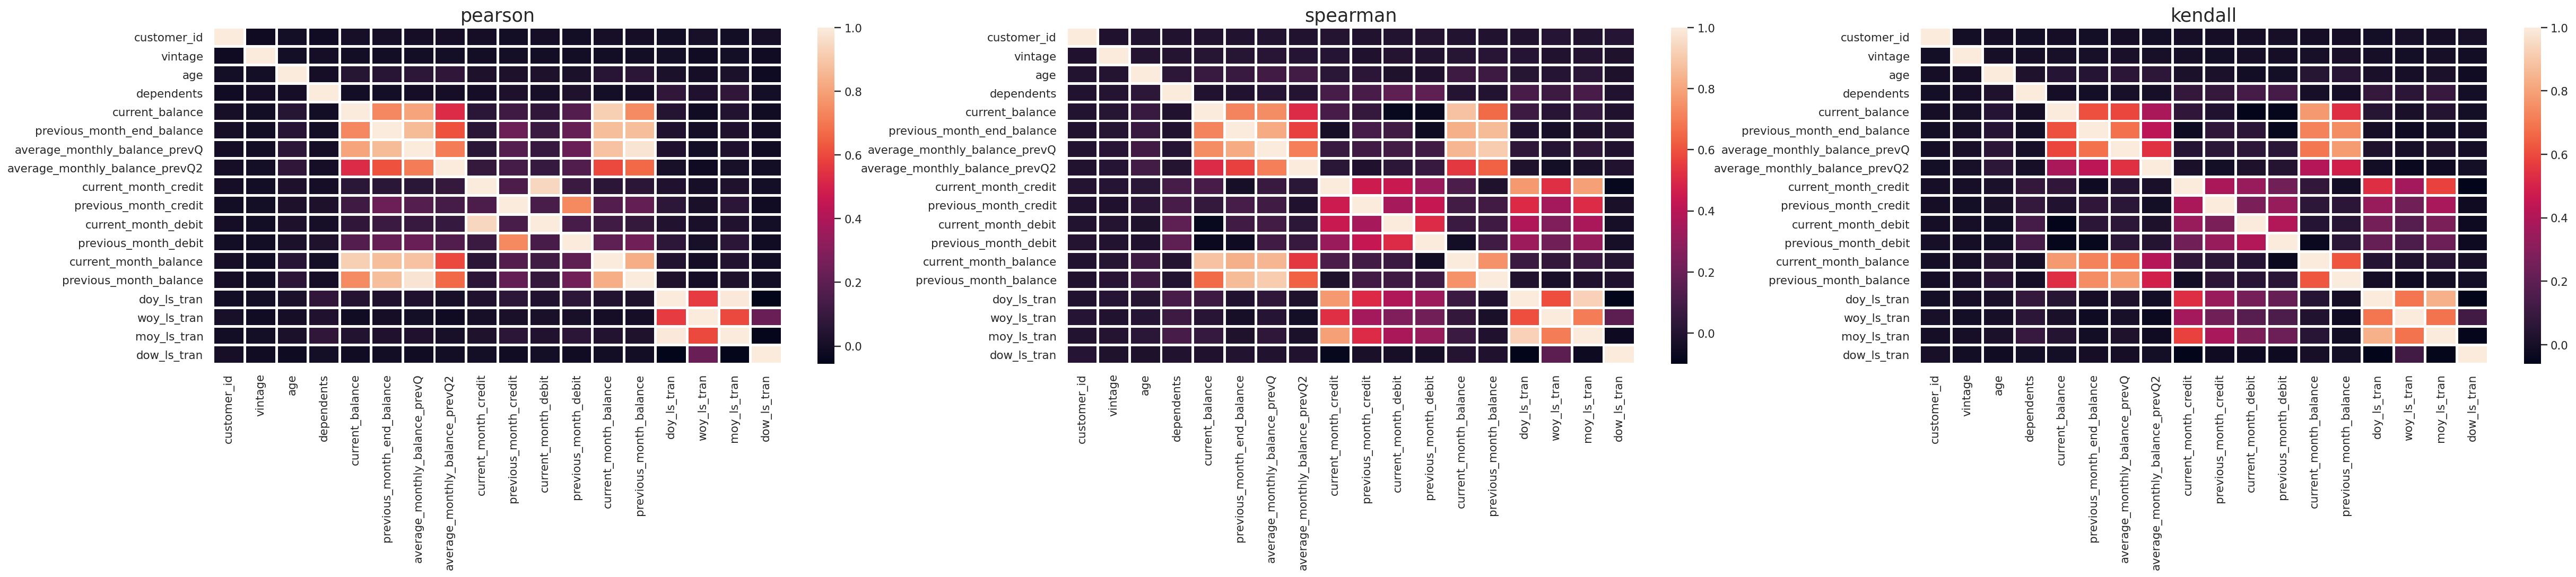

In [72]:
#lets draw heatmap and compare all the 3 correlation cofficients -- pearson, spearman nd kendall's tau
plt.figure(figsize = (42,6), dpi = 140)
for j,i in enumerate(['pearson', 'spearman', 'kendall']):
    plt.subplot(1,3,j+1)
    correlation = data.dropna().corr(method = i)
    sns.heatmap(correlation, linewidth = 2)
    plt.title(i, fontsize= 18)

- kendall and spearman seems to have really similar behaviour except the minor difference of magnitude
- there a lot of variable which are not significant
- there seemed to be the high correlation between my balance variables and transaction date variables

In [73]:
#lets try to plot current month, previous month and previous quarter data
var = list()
var.extend(current_month)
var.extend(previous_month)
var.extend(previous_quarters)


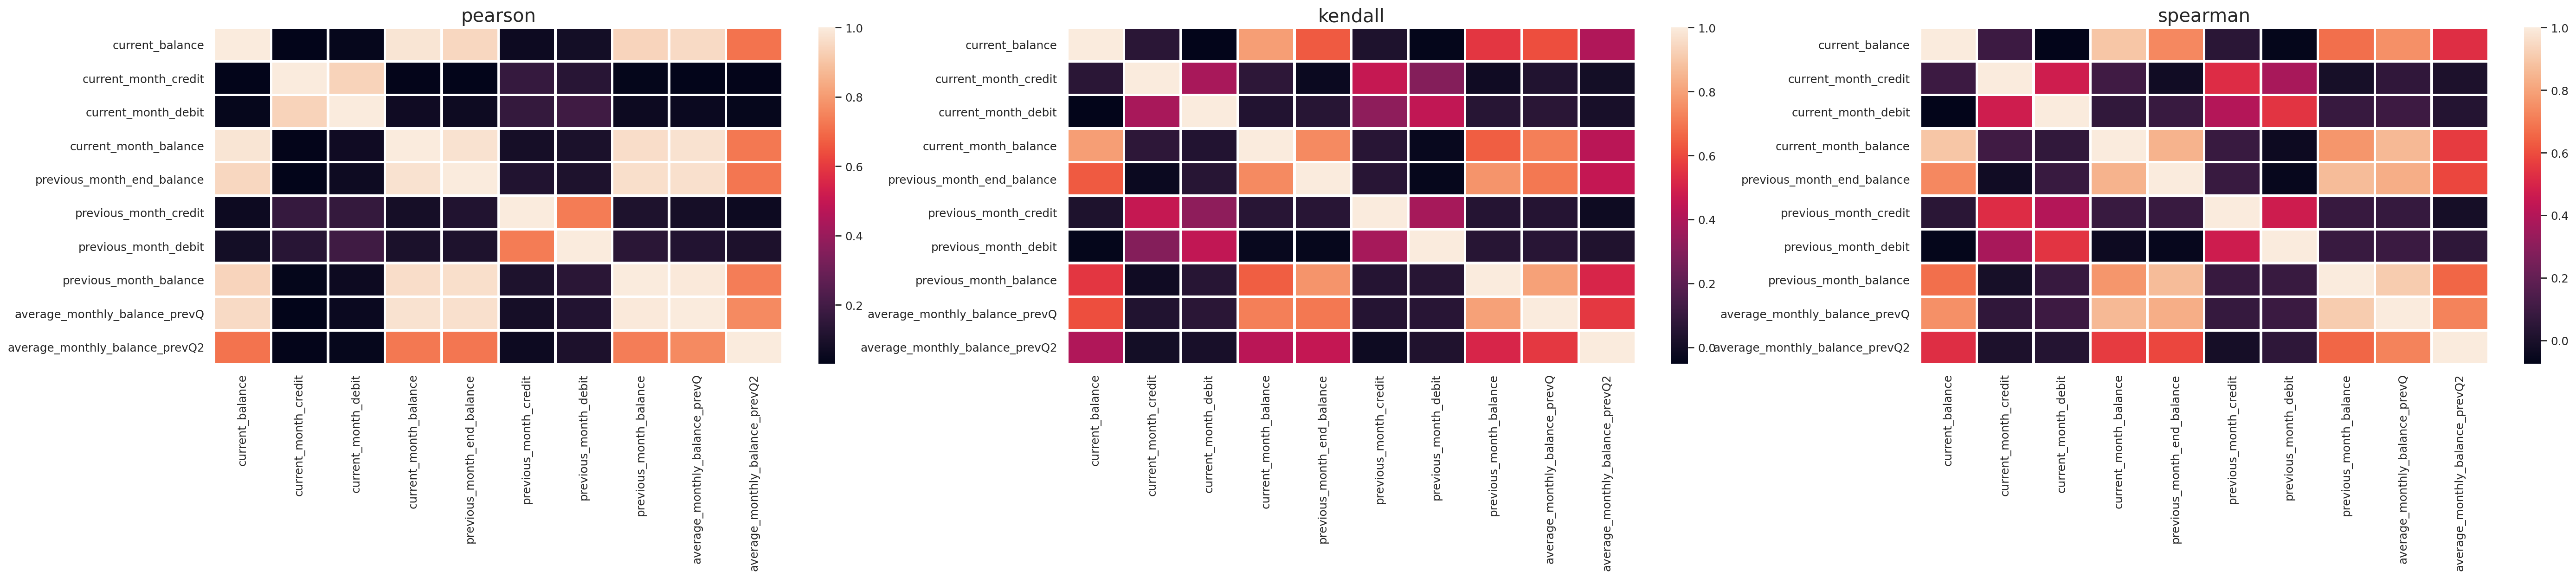

In [74]:
plt.figure(figsize=(42,6), dpi=160)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical[var].dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)

**Inferences:**


1.   Transaction variables like credit/debit have a strong correlation among themselves.
2.  Balance variables have strong correlation among themselves.
3.   Transaction variables like credit/debit have insignificant or no correlation with the Balance variables.



In [75]:
#lets see the variables and their relation in balance and tranactions
transactions = ['current_month_credit','current_month_debit','previous_month_credit','previous_month_debit']
balance = ['previous_month_end_balance','previous_month_balance','current_balance','current_month_balance']

In [76]:
#plt.figure()
# sns.pairplot(numerical[transactions], plot_kws = {'alpha' : 0.1})

In [77]:
# plt.figure(dpi = 140)
# sns.pairplot(numerical[balance], plot_kws = {'alpha': 0.1})

In [78]:
#these scatterolot are not meaningful due to the presence of the outliers
#taking log of every value to negate outliers
for column in var:
  mini=1
  if numerical[column].min()<0:
    mini =  abs(numerical[column].min()) + 1
  
  numerical[column] = [i+mini for i in numerical[column]]
  numerical[column] = numerical[column].map(lambda x : np.log(x))

<Figure size 840x560 with 0 Axes>

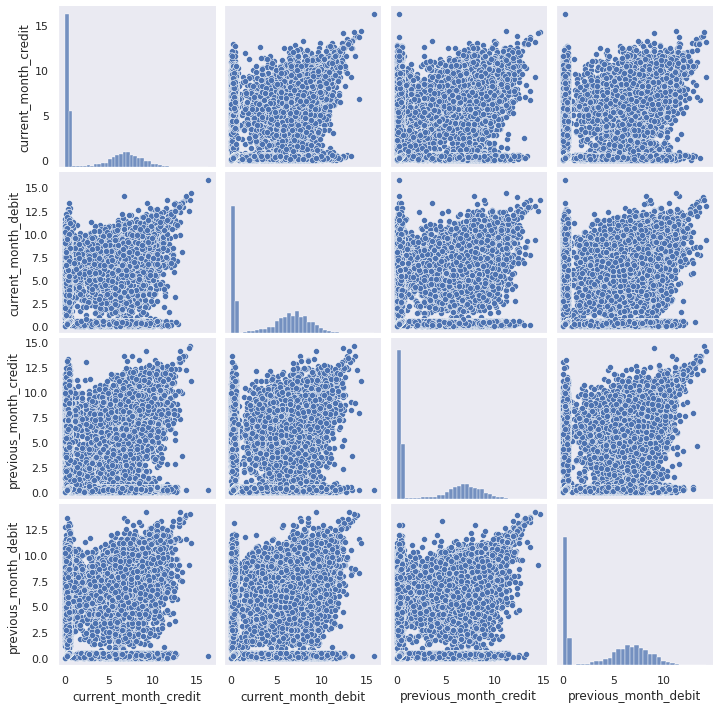

In [79]:
# scatter plot for transactional variables
plt.figure(dpi=140)
sns.pairplot(numerical[transactions])

we can clearly see an upward trend here.and also the high presence of the outliers, which validates high correlation among my transaction variables, and this correlation can further be utilized in feature engineering.

<Figure size 840x560 with 0 Axes>

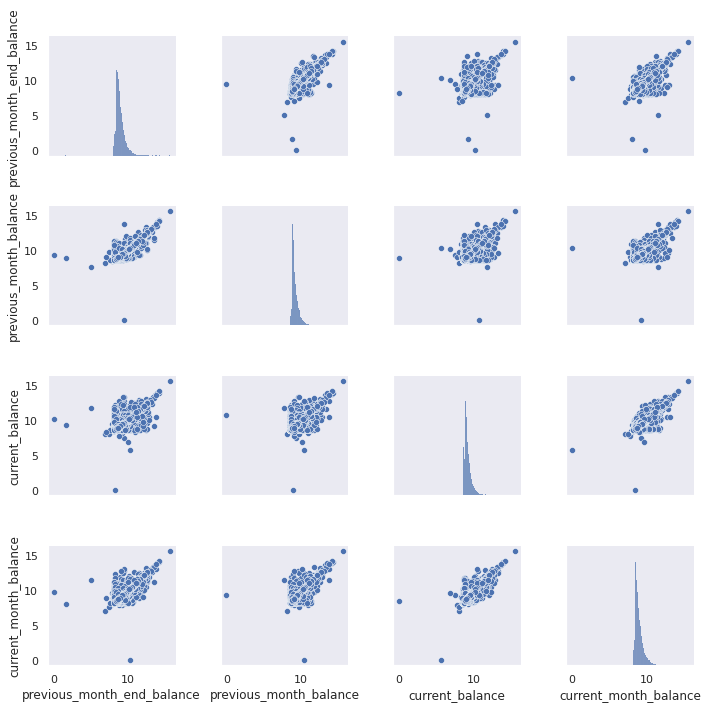

In [80]:
plt.figure(dpi=140)
sns.pairplot(numerical[balance])

Here as well, a strong upward trend can be seen in all the balance variables which represents high correlation among all the balance variable

In [81]:
#since we can see a high correlation in balance variable , so there is chance of this same relation in my previous 2 quarter balance as well
#lets verify
numerical.columns

Index(['customer_id', 'vintage', 'age', 'dependents', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'doy_ls_tran',
       'woy_ls_tran', 'moy_ls_tran', 'dow_ls_tran'],
      dtype='object')

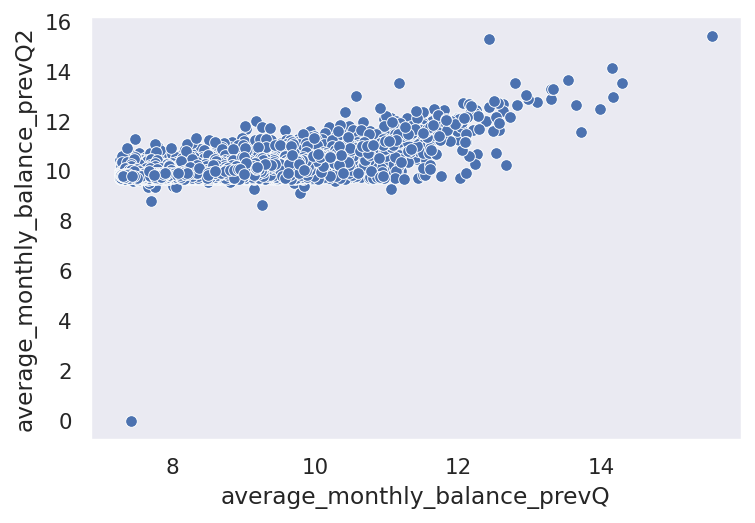

In [82]:
plt.figure(dpi = 140)
sns.scatterplot(numerical['average_monthly_balance_prevQ'], numerical['average_monthly_balance_prevQ2'])

Here as well, a strong correlation can be observed between average monthly balance for the previous quarter and the current quarter

# Bi- variate analysis - Continuous categorical 

here , we will use the statistical tests to determine if the our hypothesis are true or not(using pvalue)

-  Are vintage customer less likely to churn?
- are customer with higher avg balance less likely to churn?
- Are customer dropping monthly balance highly likely to churn?

In [83]:
def twosampleZ(X1, X2, sigma1, sigma2, N1, N2):
  from numpy import sqrt, abs, round
  from scipy.stats import norm
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval

In [84]:
def twosampleT(X1, X2, sd1, sd2, n1, n2):
  from numpy import sqrt, abs, round
  from scipy.stats import t as t_dist
  ovr_sigma = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sigma
  df = n1 + n2 -2
  pval = 2*(1 - t_dist.cdf(abs(t), df))
  return pval

In [85]:
def Bivariate_cont_cat(data, cont, cat, category):
  #creating 2 samples
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  
  #descriptive
  n1 = x1.shape[0]
  n2 = x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()

  #calculating p- value using these descriptive
  z_p_val = twosampleZ(m1, m2, std1, std2, n1, n2)
  t_p_val = twosampleT(m1, m2, std1, std2, n1, n2)

  table = pd.pivot_table(data = data, values = cont, columns = cat, aggfunc = np.mean )

    #plotting
  plt.figure(figsize = (15,6), dpi=140)

  
  #barplot
  plt.subplot(1,2,1)
  sns.barplot([str(category),'not {}'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')


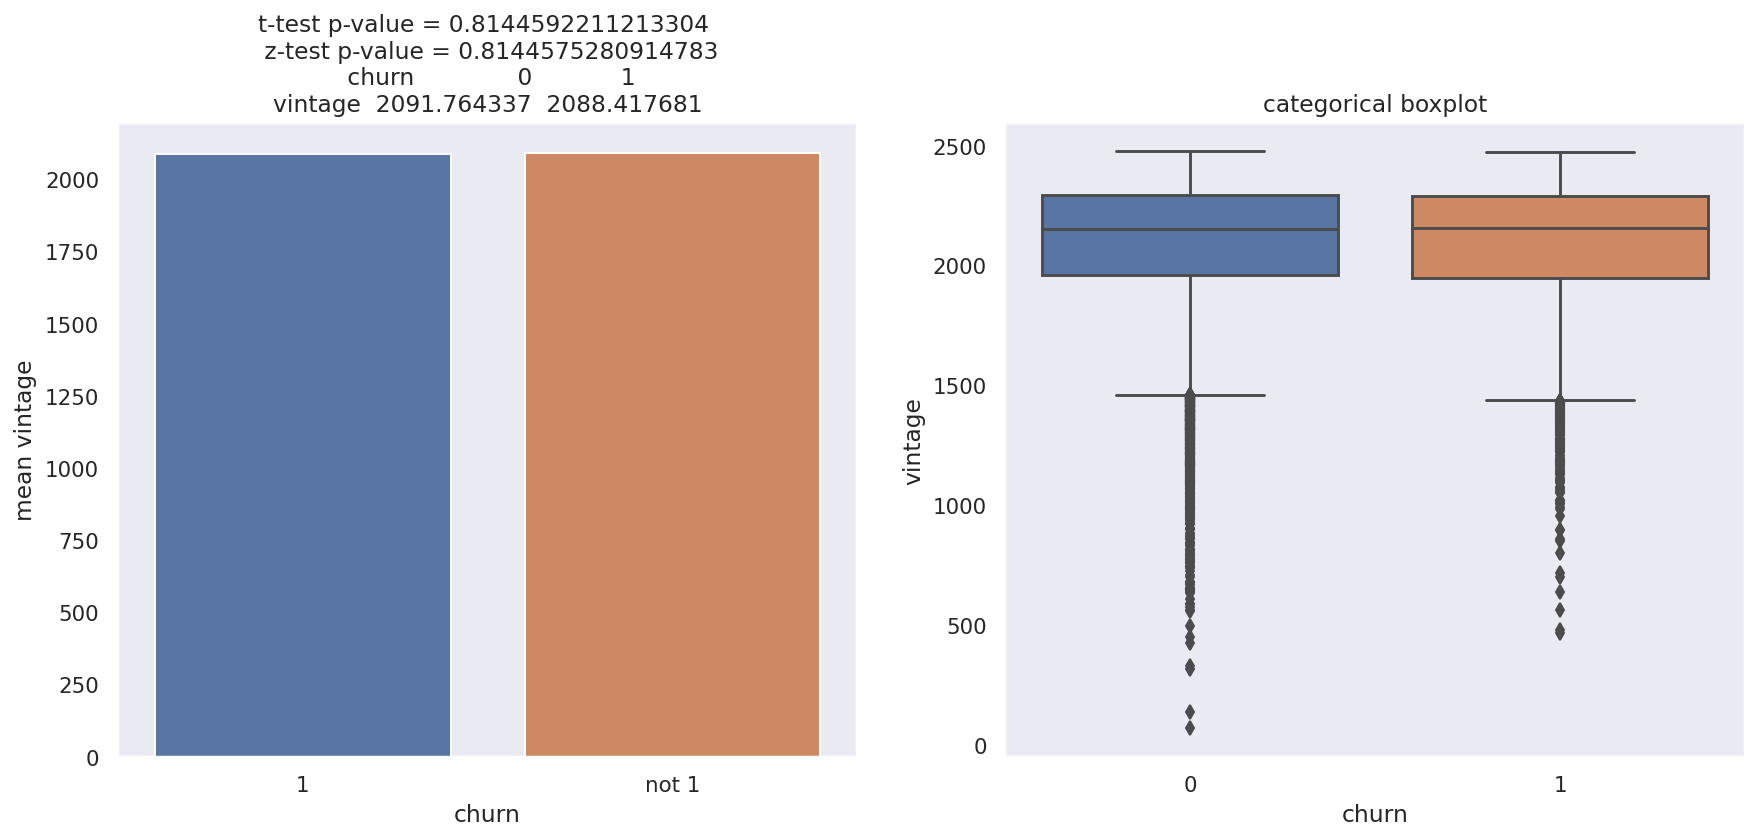

In [86]:
#lets see if the vintage customer have some significant difference over my churning rate
Bivariate_cont_cat(data, 'vintage', 'churn', 1)

on examining , we can clearly see that the average of vintage customer for churning is more than non - churning customer , but that difference is not statistically significant enough so that on the basis of which we can say that there is a significant effect of that and hence we can say that there is no effect of vintage on my churning behaviour of the customer

so , vintage customer churned more , but result is not statiscally significant.

hence we can safely reject our null hypothesis that vintage customer are more likely to churn.

# Are customer with higher average balance less likely to churn?

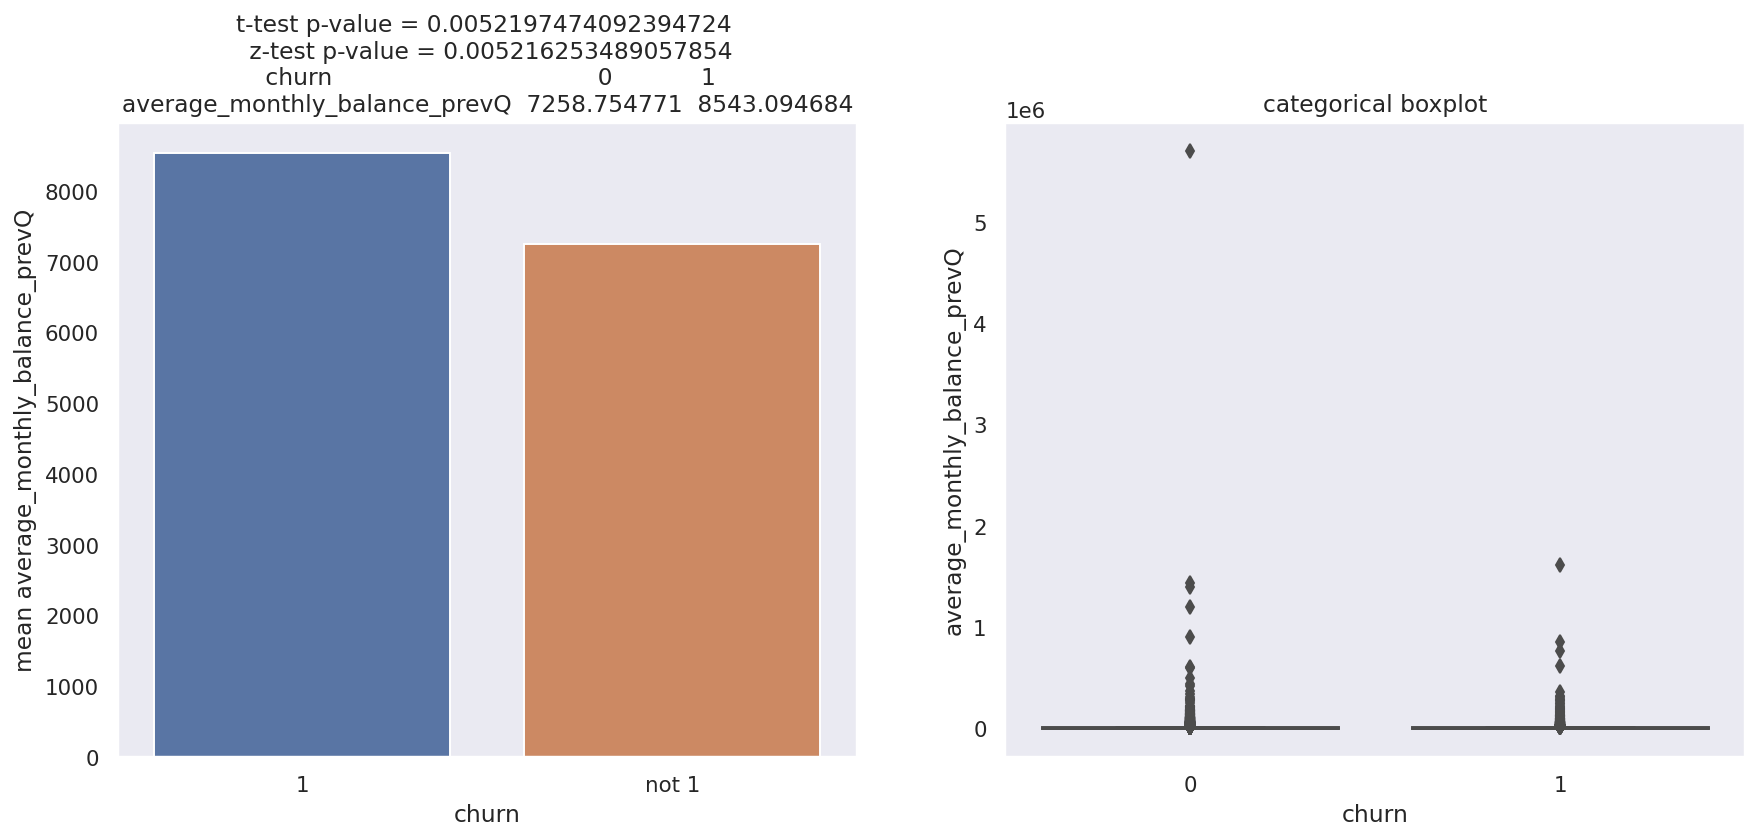

In [87]:
Bivariate_cont_cat(data, 'average_monthly_balance_prevQ', 'churn', 1)

we can clearly see that the churning customer have higher avg balance than non churning customer in previous quearter and since my p value is less than 0.05 , hence my result is statistically significant.

hence we accept the hypothesis that customer with higher average balance in previous quarter are more likely to churn.


# lets examine for the 2nd previous quarter

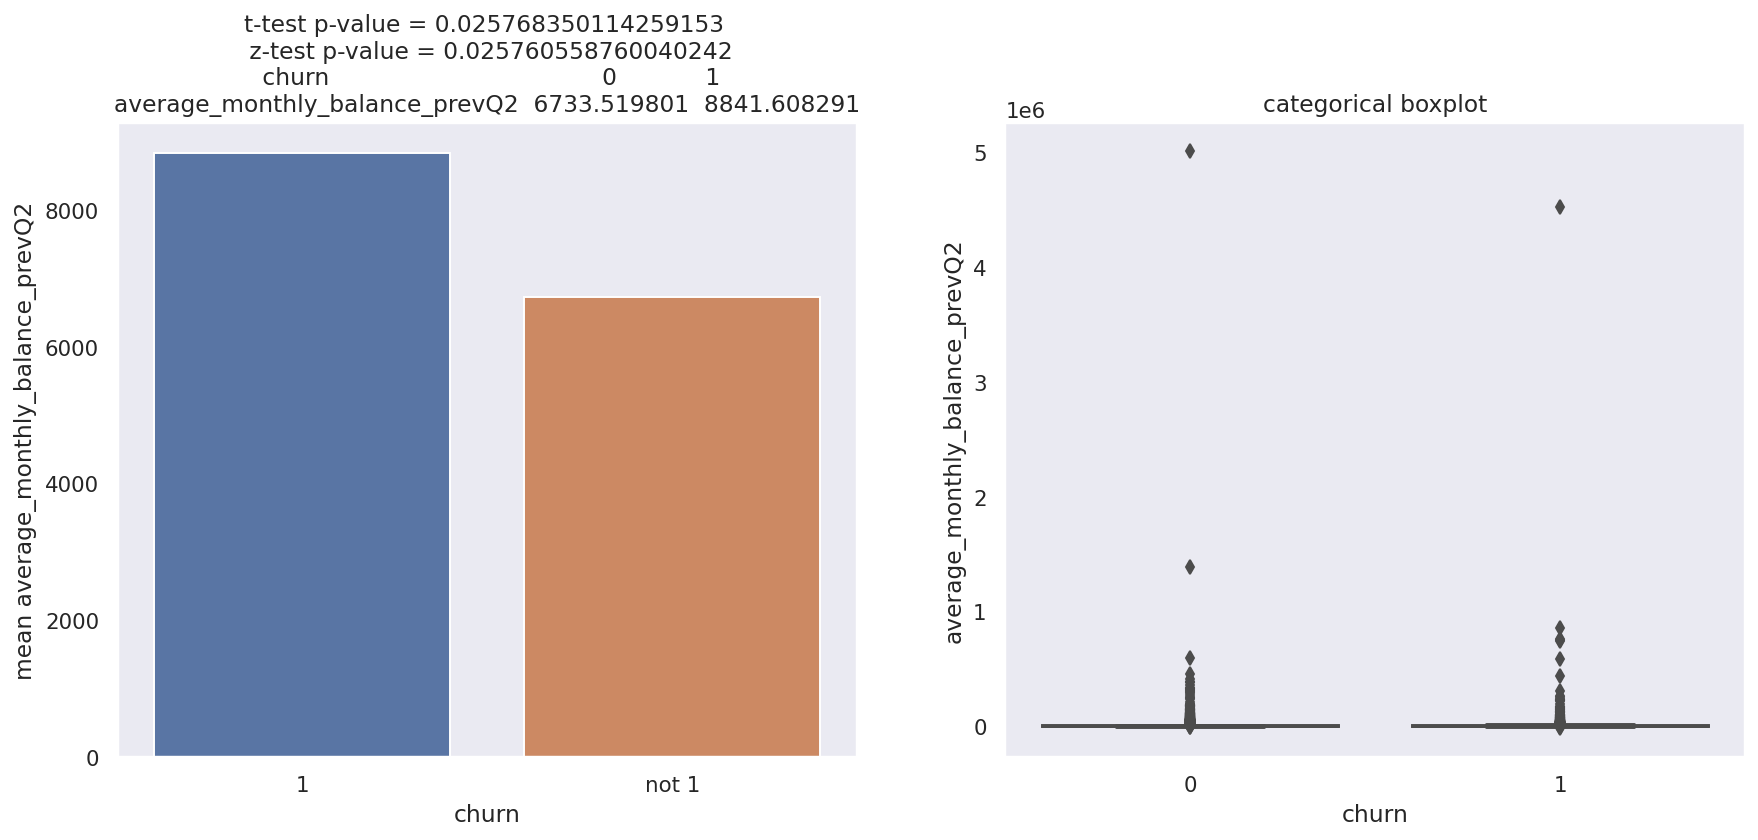

In [88]:
Bivariate_cont_cat(data, 'average_monthly_balance_prevQ2', 'churn', 1)

here ,as well the same kind of pattern can be observed and we can clearly see a significant difference between avg balance of 2nd previous quarter for churning and non churniing customer and the result is also statiscally significant

RESULT - we can clearly see that the customer who actually churned have significantly higher balance in the previous 2 quarters

In [89]:
numerical.columns

Index(['customer_id', 'vintage', 'age', 'dependents', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'doy_ls_tran',
       'woy_ls_tran', 'moy_ls_tran', 'dow_ls_tran'],
      dtype='object')

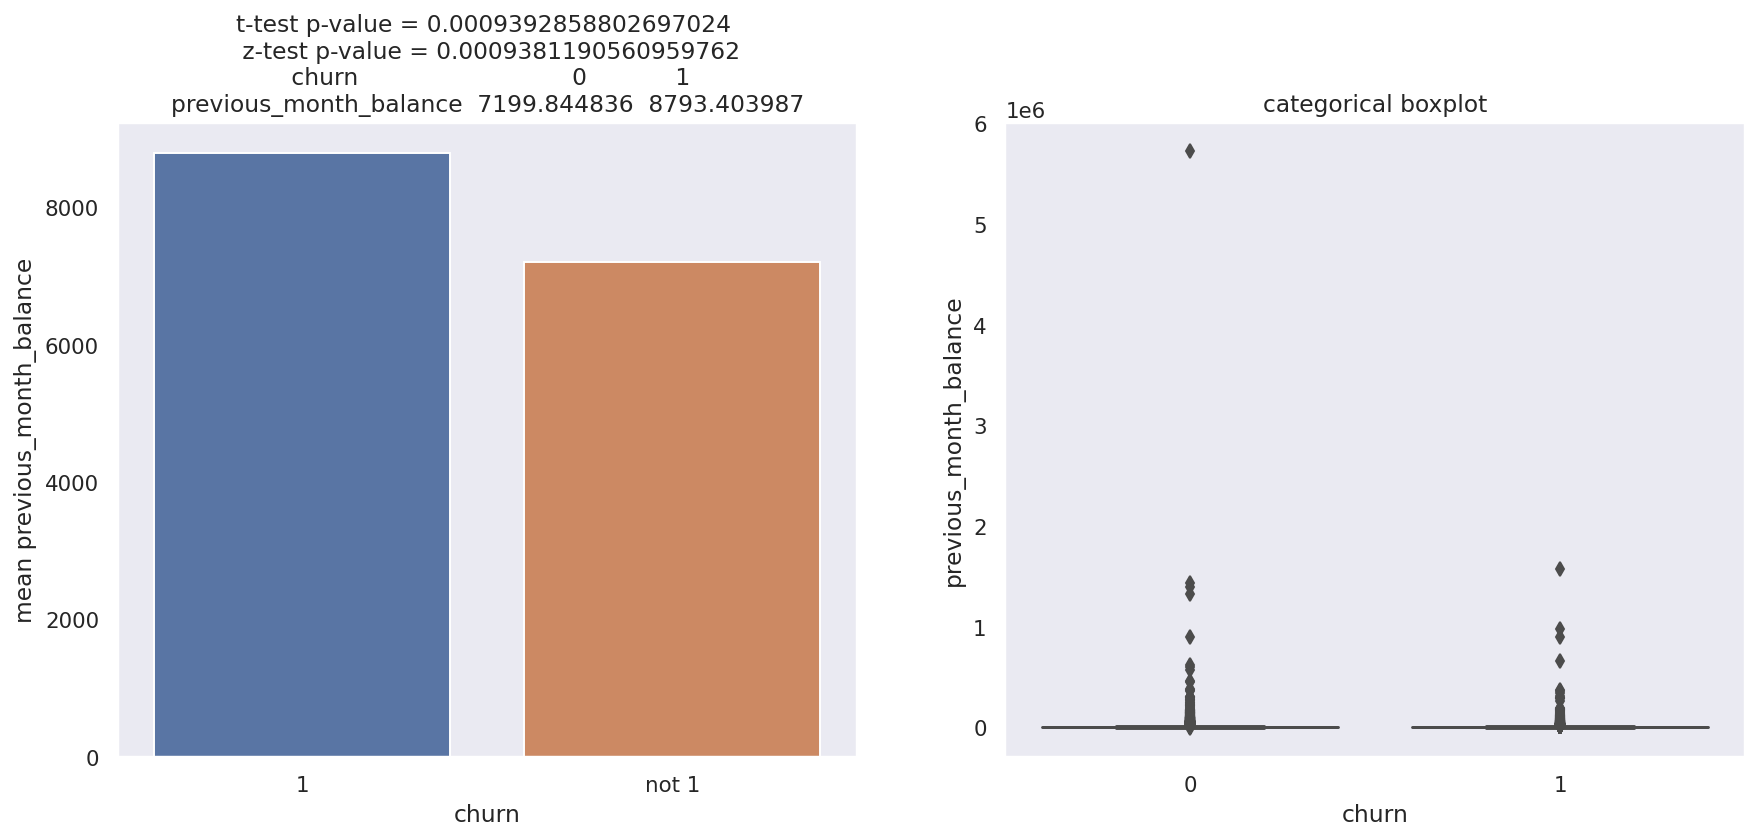

In [90]:
# let's check the same on monthly level
Bivariate_cont_cat(data, 'previous_month_balance', 'churn', 1)

here as well, the same kind of pattern can be seen the customer who churned more have relatively higher balance than the customer who did not churned, the result is also statistically significant.

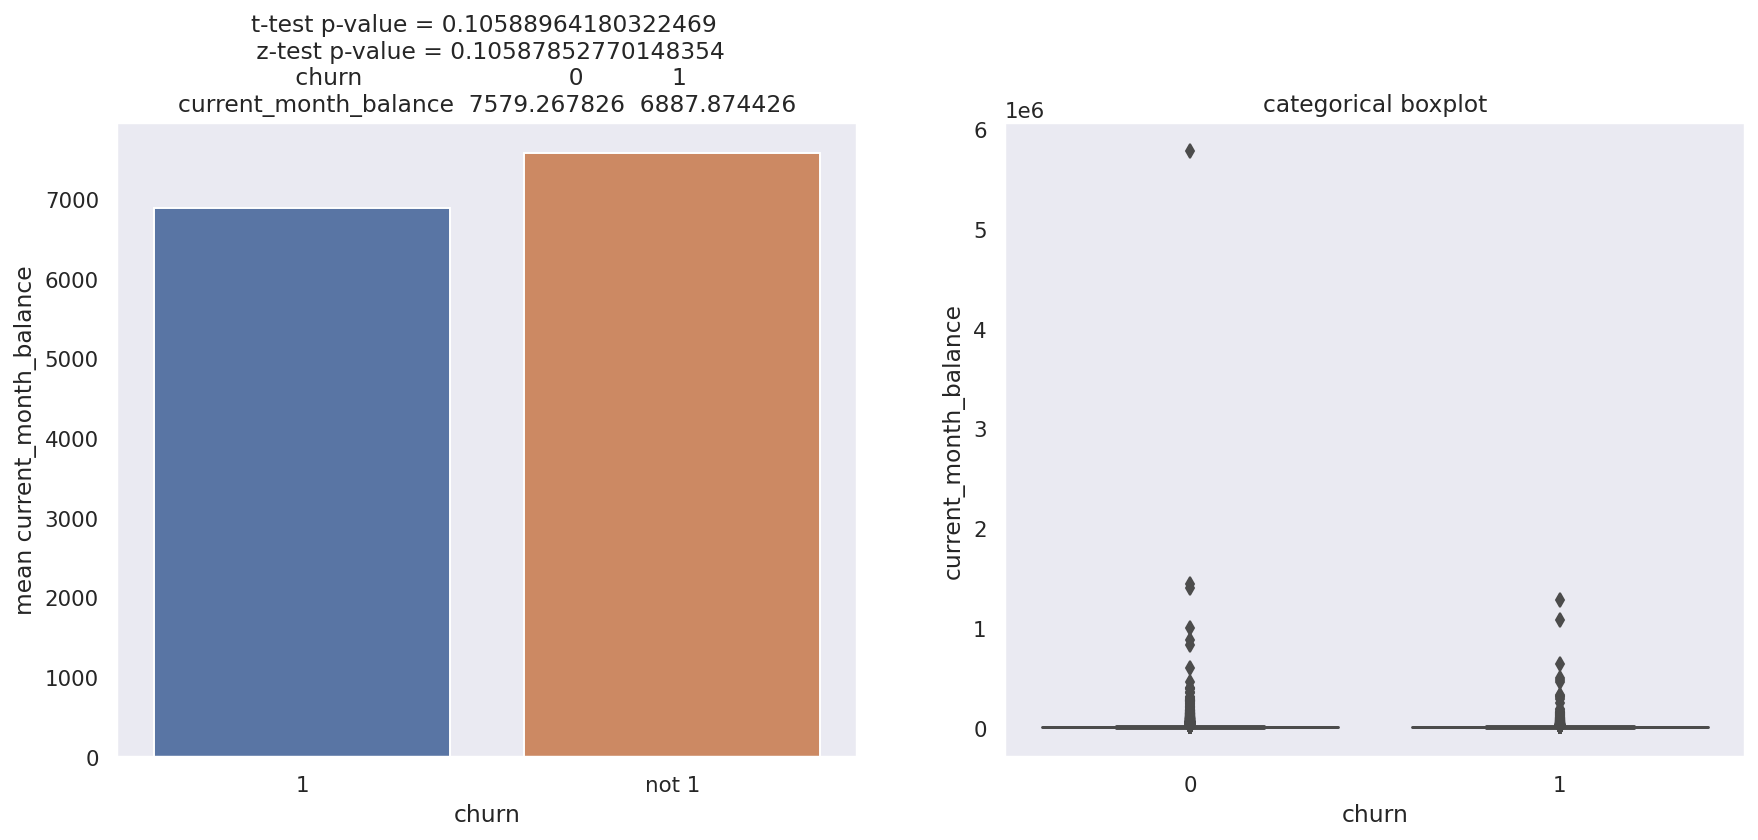

In [91]:
# lets examine for the current month
Bivariate_cont_cat(data, 'current_month_balance', 'churn', 1)

A really intresting pattern we can observe here there is a huge average balance drop in for the customer who churned wrt customer , who did not churn . though at 5% level of significance this result is not statistically significant, but one thing that we can infer from here is , that means there should be high current month debit for the customer who actually churned.

# lets examine this

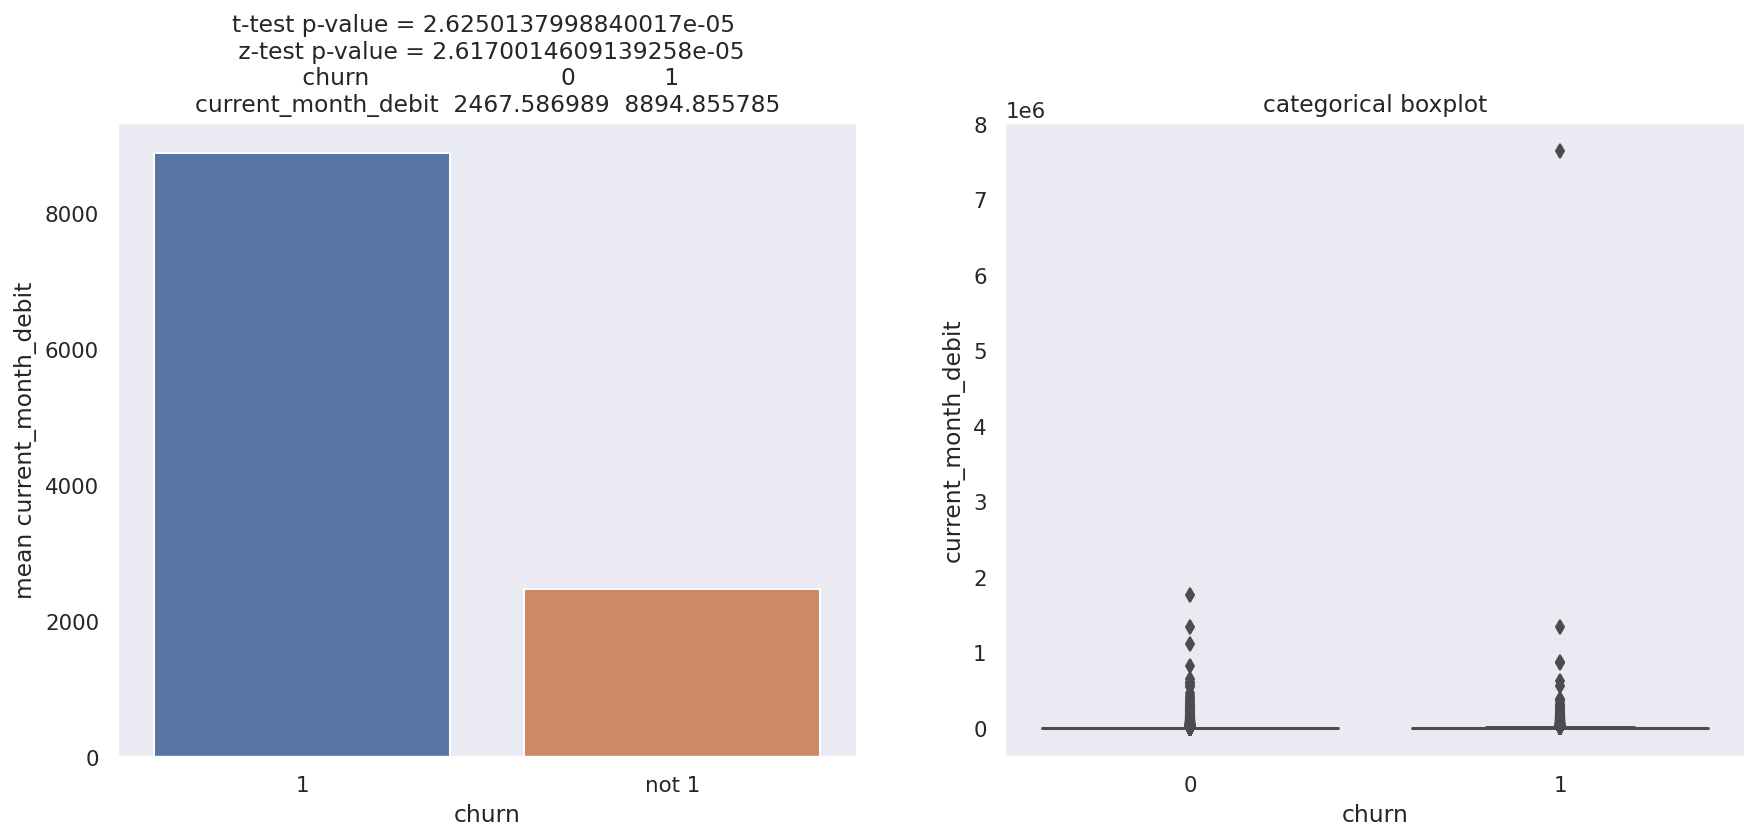

In [92]:
Bivariate_cont_cat(data,'current_month_debit', 'churn', 1 )

Absolutely right we can clearly see a huge difference of current month credit between the customers who churned and who did not and the result is also statistically significant.

- *** From here we can clearly conclude the customer with high current month debit are more likely to churn.

# lets check it from the other way as well, let's verify if the customer with low current month credit are more prone to churn or not

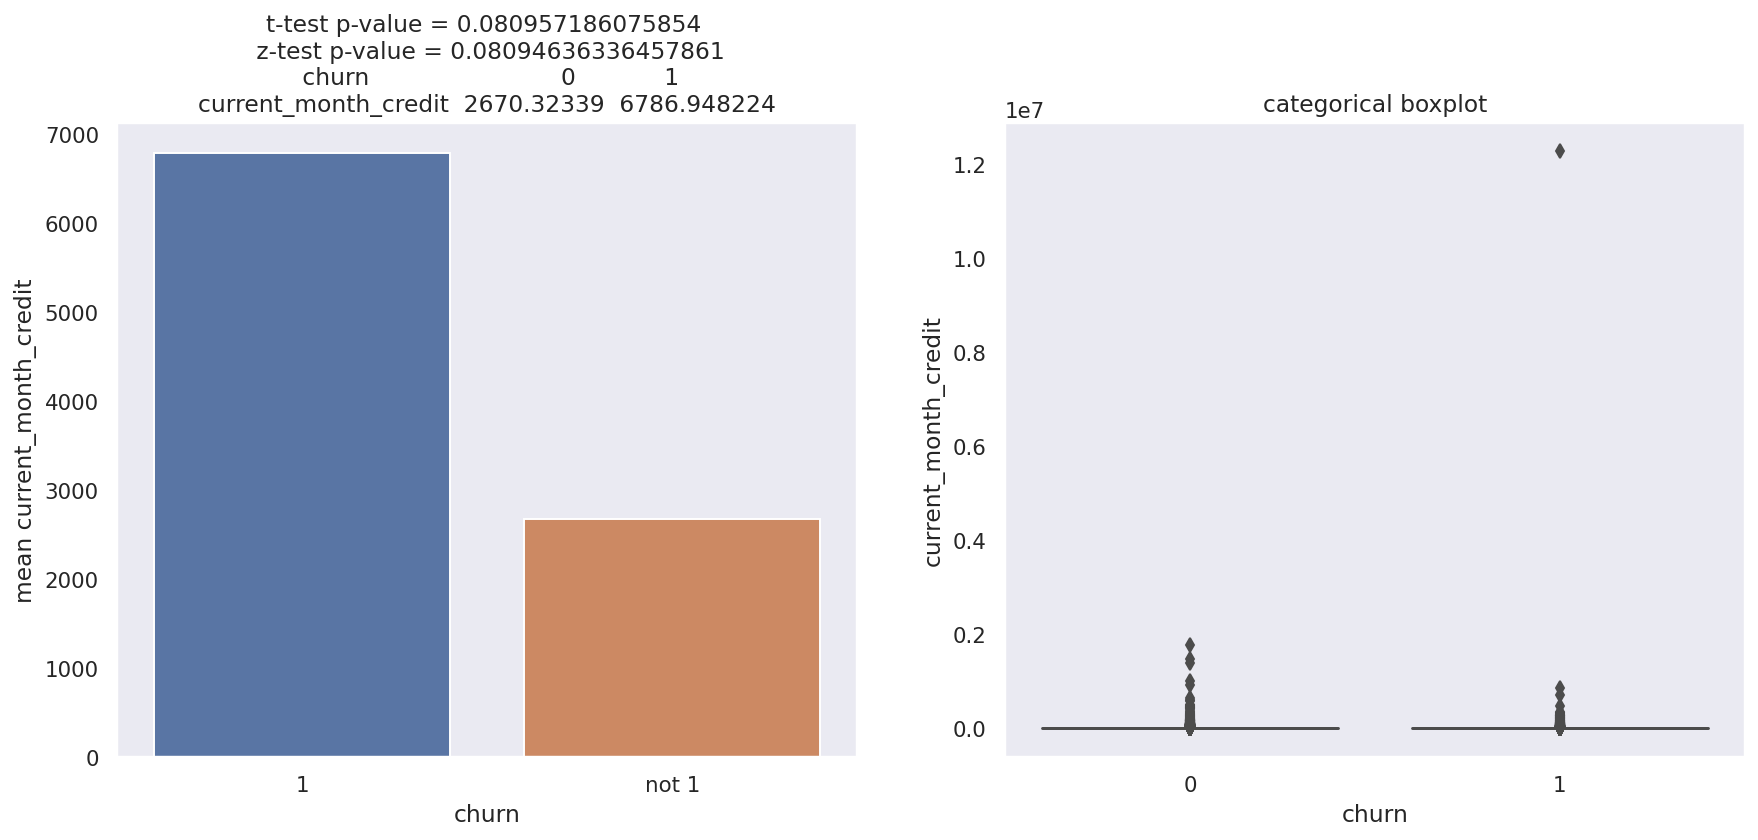

In [93]:
Bivariate_cont_cat(data, 'current_month_credit', 'churn', 1)

nope, our assumption here is wrong since the customer who churned have on an avg higher current month credit than those who did not , though at given level of significance this result is not statiscally significant

# Are customer dropping monthly balance are highly likely to churn?

In [94]:
# Extracting drop of balance in previous and current month
difference = data[['churn','previous_month_balance','current_month_balance']][:]
difference['bal_diff'] = difference['current_month_balance']-difference['previous_month_balance']

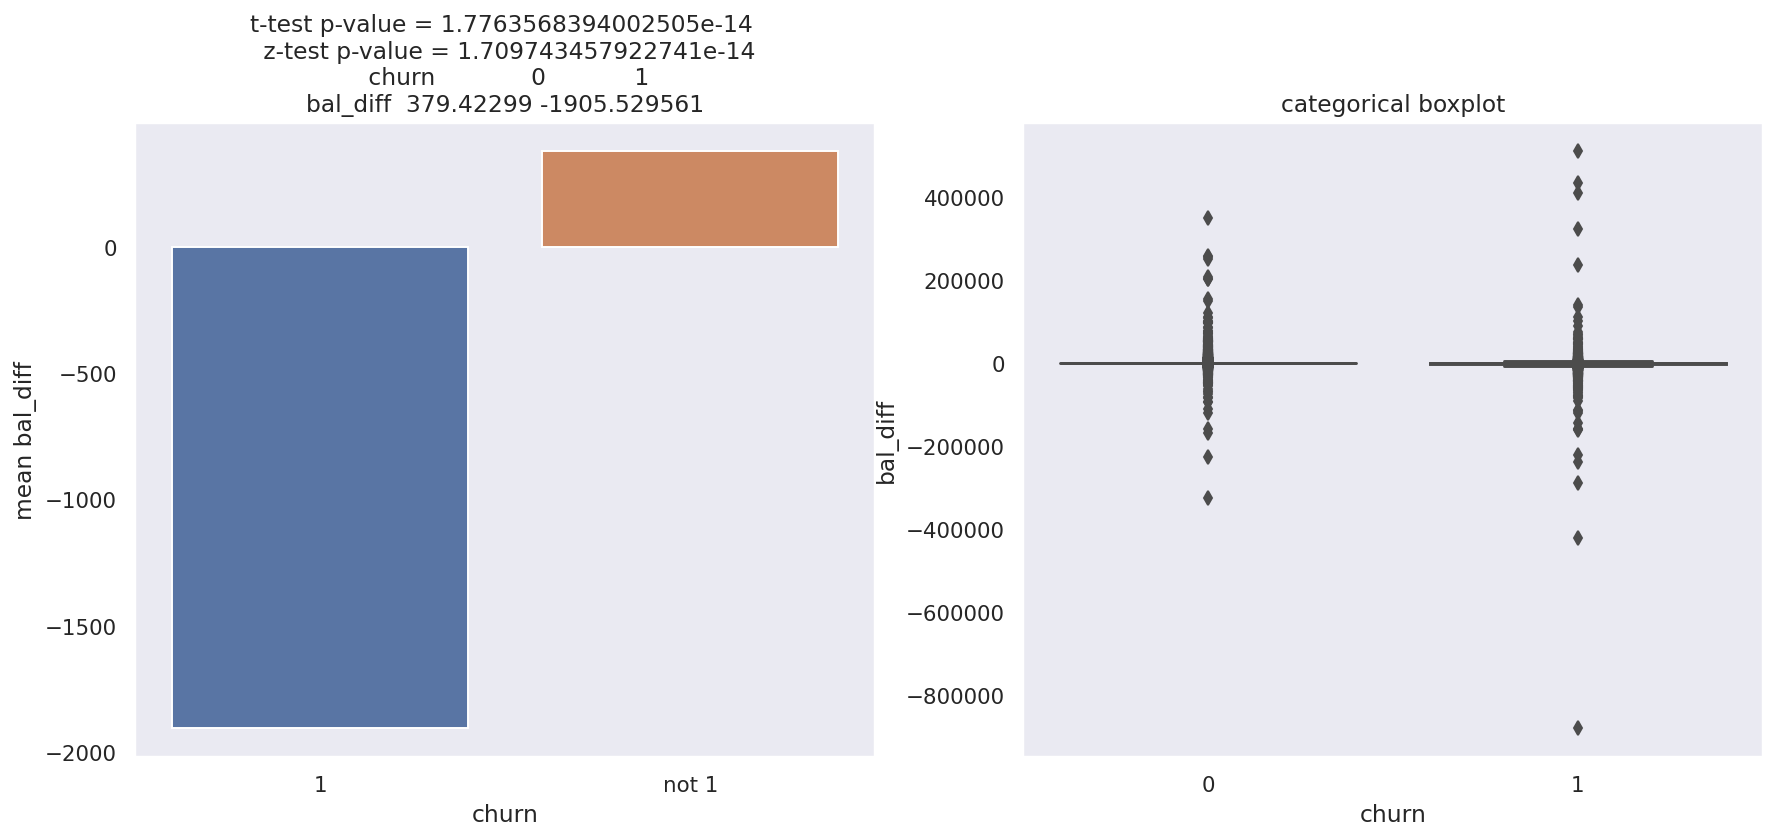

In [95]:
Bivariate_cont_cat(difference, 'bal_diff', 'churn', 1 )

again , we can clearly see there is a huge drop in the avg balance of customer from previous to current month , who are likely to churn, and the result is also statistically significant.

- hence the customer with dropping monthly balance are more likely to churn which can be identified in this bar plot as well.

# Bi-variate analysis - categorical - categorical

here we will be using chi square test to check if two two categorical variable are significantly different from each other

List of hypothesis to check under this - 
- Are female customers less likely to churn?
- Are young customer more likely to churn?
- Are customer in lower income bracket more likely to churn?
- are customer with dependents more likely to churn?
- are customer with average family size less than 4 are more likely to churn?
- customers whose last transaction was more than 6 months ago are more likely to churn?
- Possibility that cities and branch code with very few accounts may lead to churning.

Missing Values - finding behaviour

Gender:

Do missing values churn more?

Dependents:

Do missing values have any relation with churn?

Occupation:

Do they have some relation with churn?

In [96]:
def BVA_categorical_plot(data, tar, cat):
  '''
  take data and two categorical variables,
  calculates the chi2 significance between the two variables 
  and prints the result with countplot & CrossTab
  '''
  #seprating variables
  data = data[[cat,tar]][:]

  #crosstab
  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  #performing chi2 test
  from scipy.stats import chi2_contingency
  chi, p, dof, expected = chi2_contingency(f_obs)
  
  #checking whether results are significant
  if p<0.05:
    sig = True
  else:
    sig = False

  #plotting grouped plot
  sns.countplot(x=cat, hue=tar, data=data)
  plt.title("p-value = {}\n difference significant? = {}\n".format(round(p,8),sig))

  #plotting percent stacked bar plot
  #sns.catplot(ax, kind='stacked')
  ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()
  ax1.plot(kind='bar', stacked='True',title=str(ax1))
  int_level = data[cat].value_counts()

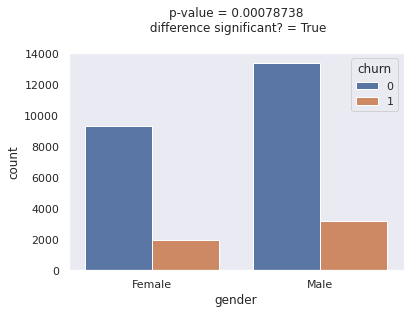

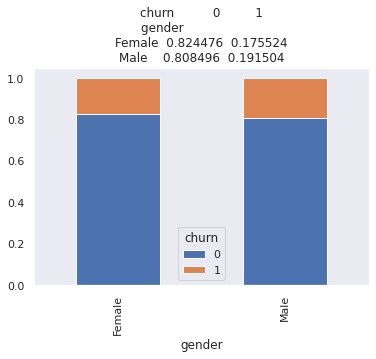

In [97]:
#are female less likely to churn than males?
BVA_categorical_plot(data, 'churn', 'gender')

here , we can clealry see that difference between male and feamle churning is statistically significant , since my p value is less than 0.05
hence we can say that female customer are less likely to churn than males


In [98]:
#are young customer more likely to churn?
# for that we need to create separate bucket of that
churn = data[['churn','age']][:]
churn['age_group'] = 'str'
churn['age_group'][churn['age']>=80] = 'very old'
churn['age_group'][(churn['age']<80) & (churn['age']>=60)] = 'senior citizen'
churn['age_group'][(churn['age']<60) & (churn['age']>=18)] = 'adult'
churn['age_group'][churn['age']<18] = 'young'

In [99]:
churn.age_group.value_counts()

adult             20107
senior citizen     5880
very old           1589
young               806
Name: age_group, dtype: int64

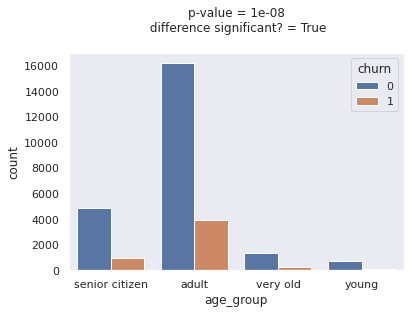

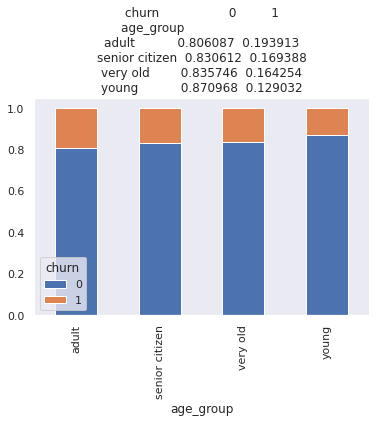

In [100]:
BVA_categorical_plot(churn, 'churn', 'age_group')

- we can clearly see that there is a huge no of ppl in adult group who churned and who did not churned.
- so most of the customer of the bank belongs to adult category.
- also since my p value is less than 0.05 we can say that age group has significant effect on my churning rate.

# Are customer in lower income bracket are more likely to churn?

In [101]:
data.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'doy_ls_tran', 'woy_ls_tran', 'moy_ls_tran', 'dow_ls_tran'],
      dtype='object')

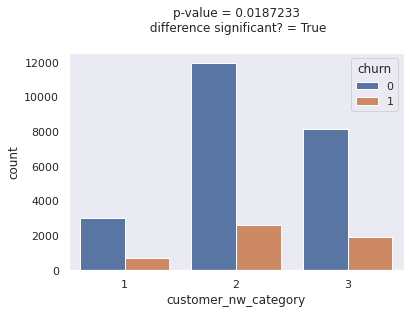

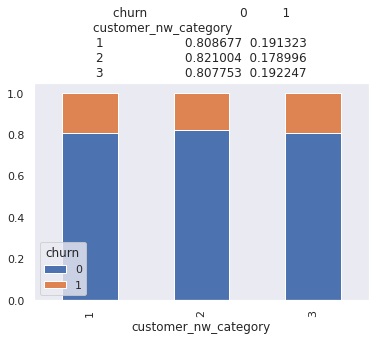

In [102]:
BVA_categorical_plot(data, 'churn', 'customer_nw_category')

- we can clearly see that most of the customer belong to the middle category, and since my p value is less than 0.05 hence customer category as per their income has significant effect on my churning rate.

# Are customer with dependents less likely to churn?

In [103]:
dependents = data[['dependents', 'age', 'churn']][:]
dependents['familysize'] = None
dependents['familysize'][dependents['dependents'] == 1] = 'Single'
dependents['familysize'][(dependents['dependents'] > 1) & (dependents['dependents'] <= 4)] = 'Small Family'
dependents['familysize'][(dependents['dependents'] > 4) & (dependents['dependents'] <= 9)] = 'Large Family'
dependents['familysize'][(dependents['dependents'] > 9)] = 'Joint Family'


In [104]:
dependents.familysize.value_counts()

Small Family    3030
Single          1395
Large Family      54
Joint Family       5
Name: familysize, dtype: int64

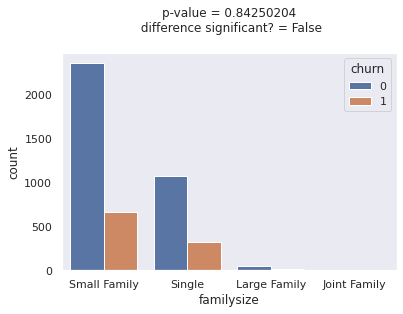

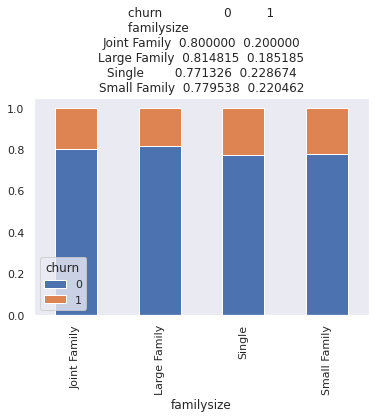

In [105]:
BVA_categorical_plot(dependents, 'churn', 'familysize')

- most of the account holders belong to the small family size.
- since my p value is greater than 0.05, we fail to reject our null hypothesis , and hence we say that family size does not have the significant effect on my churning rate.
- but the fact that most of the customer are from small size family , this fact can obviously be used by the top management to introduce new plans and scheme for their account holders

- customers whose last transaction was more than 6 months ago are more likely to churn?

In [106]:
data.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'doy_ls_tran', 'woy_ls_tran', 'moy_ls_tran', 'dow_ls_tran'],
      dtype='object')

In [107]:
#segregating customer as per the month of their last transaction
transaction_month = data[['moy_ls_tran', 'churn']]
transaction_month['recent']  = transaction_month['moy_ls_tran'].map(lambda x: 'more than 6 months' if x>7 else 'within 6 months')

In [108]:
transaction_month.head(20)

,moy_ls_tran,churn,recent
0,5.0,0,within 6 months
1,11.0,0,more than 6 months
2,NaN,0,within 6 months
3,8.0,1,more than 6 months
4,11.0,1,more than 6 months
5,11.0,0,more than 6 months
6,9.0,0,more than 6 months
7,7.0,0,within 6 months
8,12.0,0,more than 6 months
9,12.0,0,more than 6 months


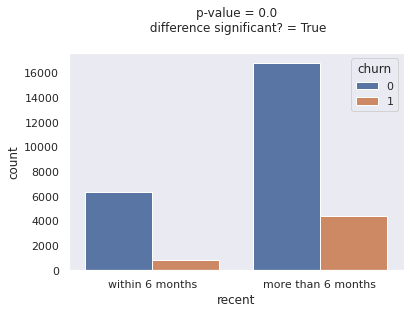

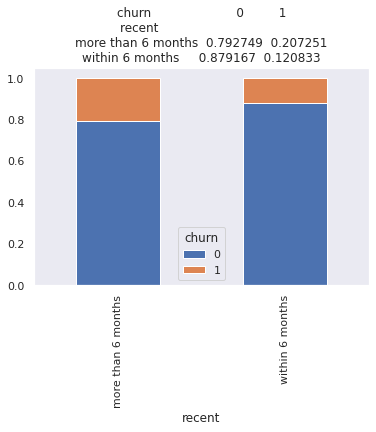

In [109]:
BVA_categorical_plot(transaction_month, 'churn', 'recent')

- we can clearly see that churning rate for customer whose last transaction is more than 6 months ago have higher rate of churn.
- since, my p - value is less than 0.05 , we can say thr transaction month have significant effect on my churning rate.

In [110]:
# lets try to find out all those city code with less than 1% of the total account
tmp = data['city'].value_counts()[:]
cities = tmp[tmp < 280].index


In [111]:
churn_acc = data[['churn','city']][:]
churn_acc['city_cat'] = None
churn_acc['city_cat'][churn_acc['city'].isin(cities[:])] = 'low accounts'
churn_acc['city_cat'][~churn_acc['city'].isin(cities[:])] = 'high accounts'

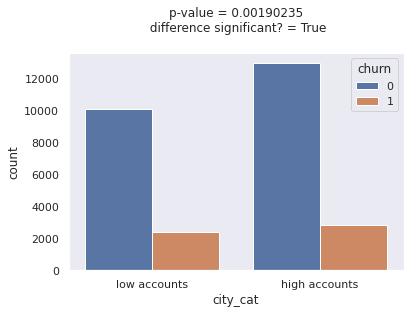

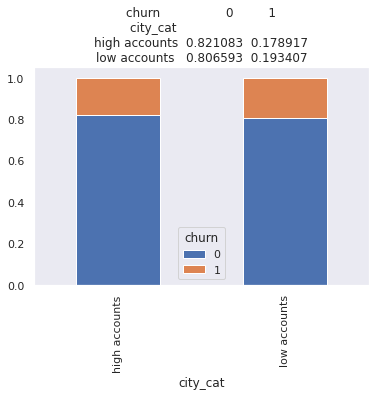

In [112]:
BVA_categorical_plot(churn_acc, 'churn', 'city_cat')

since my p value is less than 0.05 and we can clearly see that percentage of churn for cities with low account is significantly different,
hence we can say cities with less no of accounts, if a person belong to them he is likely to churn.

## Branch

getting branch codes who have more than 0.5% accounts of the total account.

In [113]:
tmp = data['branch_code'].value_counts()[:]
branch = tmp[tmp<140].index

In [114]:
# making two segments
churn_acc = data[['churn','branch_code']][:]
churn_acc['branch_cat'] = None
churn_acc['branch_cat'][churn_acc['branch_code'].isin(branch[:])] = 'low accounts'
churn_acc['branch_cat'][~churn_acc['branch_code'].isin(branch[:])] = 'high accounts'

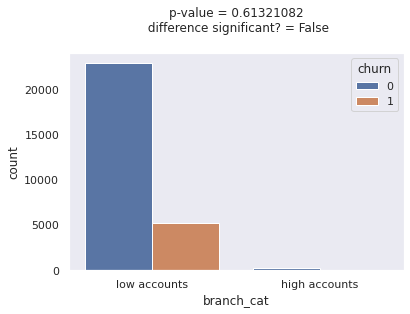

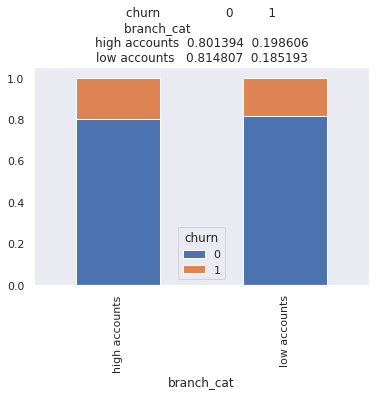

In [115]:
BVA_categorical_plot(churn_acc, 'churn', 'branch_cat')

since my p -value is greater than 0.05 , we are failed to reject our null hypothesis that there is a significant difference of rate of churning wrt to branches with less no of accounts and greater no of accounts

Missing Value : Gender
- lets see if missing values in gender have any relation with my churning customer

In [116]:
miss_gender = data[:] 
miss_gender['missing_gender'] = 'not missing'
miss_gender['missing_gender'][~miss_gender['gender'].isin(['Male', 'Female'])] = 'Missing Value'

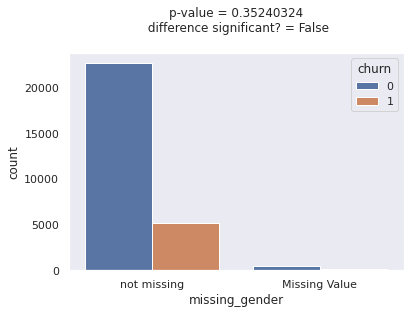

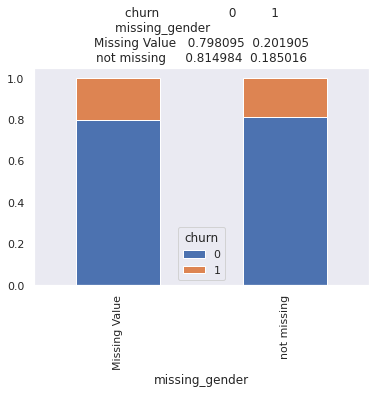

In [117]:
BVA_categorical_plot(miss_gender, 'churn', 'missing_gender')

- since my p-value is greater than 0.05 , we fail to reject our null hypothesis. and hence missing values in gender have no significant effect on churning.

# missing values in dependent
- lets see if there is any pattern that we can observe of missing values in dependents with churning

In [118]:
# isolating rows with missing gender
miss_dependents = data[:]
miss_dependents['missing_dependents'] = 'not_missing'
miss_dependents['missing_dependents'][~miss_dependents['dependents'].isin([0, 2, 3, 1, 7, 4,
                                                                           6, 5, 9, 52, 36, 50,
                                                                           8, 25, 32])] = 'missing value'

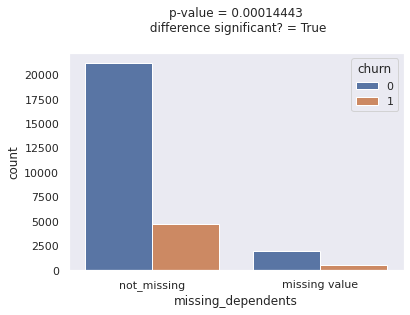

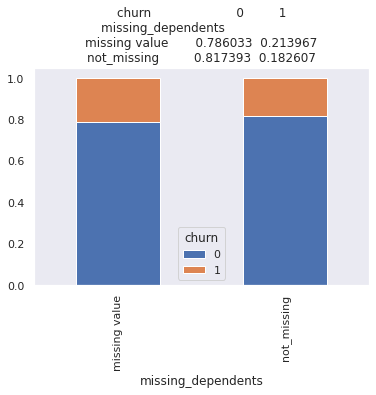

In [119]:
BVA_categorical_plot(miss_dependents, 'churn', 'missing_dependents')

- since my p value is less than 0.05, we can reject our null hypothesis and hence there is a significance of missing values in dependents on my churning rate.

# missing values in occupation
- lets see if there is a sigificant effect on churning of all those customers whose occupation is missing in my dataset

In [120]:
data.occupation.value_counts()

self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

In [121]:
miss_occupation = data[:]
miss_occupation['missing_occupation'] = 'not missing'
miss_occupation['missing_occupation'][~miss_occupation['occupation'].isin(['self_employed', 'salaried', 'student', 'retired', 'company'])] = 'missing value'

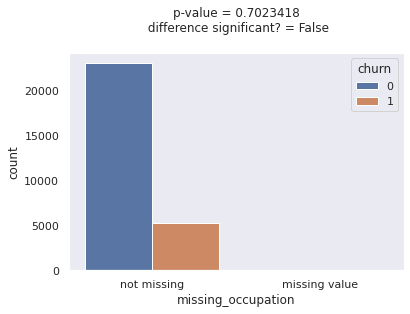

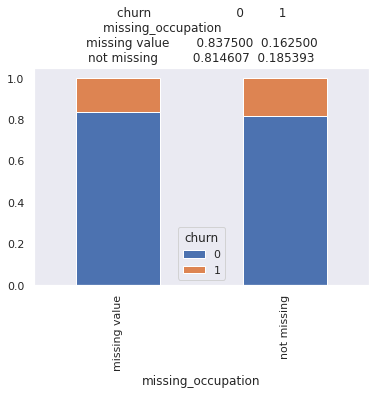

In [122]:
BVA_categorical_plot(miss_occupation, 'churn', 'missing_occupation')

since my p - value is greater than 0.05 hence missing values in occupation does not have any significant effect on my churning rate.